In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
pd.options.display.max_rows = 999

In [2]:
def plot_prediction(sample_id, df):
    df_breath = df[df['breath_id'] == sample_id].reset_index(drop = True)
    cols = ['u_in', 'u_out', 'pressure'] if 'pressure' in df.columns else ['u_in', 'u_out']
    plt.figure(figsize=(12, 4))
    for col in ['oof', 'pressure', 'u_out']:
        plt.plot(df_breath['time_step'], df_breath[col], label=col)
    
    y_true = df_breath[df_breath['u_out']==0].reset_index(drop = True)['pressure'].values
    y_pred  = df_breath[df_breath['u_out']==0].reset_index(drop = True)['oof'].values
    
    metric = mean_absolute_error(y_true,y_pred)  
    plt.legend()
    plt.title(f'Sample {sample_id} , R: {df_breath.R.unique()[0]}, C: {df_breath.C.unique()[0]} - MAE={metric:.3f}')

In [3]:
%%time
oof_preds = pd.read_csv('../03.SavedModels/baseline_lstm_v7/oof_preds.csv')
print(oof_preds.shape)
train_df  = pd.read_csv('../01.Data/train_folds.csv')
oof_preds = oof_preds.merge(train_df,on = ['id','breath_id'],how = 'left')
print(oof_preds.shape)

(6036000, 3)
(6036000, 10)
CPU times: user 7.21 s, sys: 1.92 s, total: 9.13 s
Wall time: 10.1 s


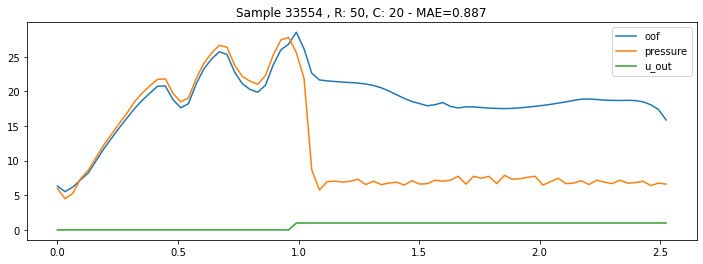

In [4]:
plot_prediction(33554,oof_preds)

In [5]:
metric_df = oof_preds[oof_preds['u_out']==0].reset_index(drop = True)
metric_df['MAE_UNIT'] = abs(metric_df['oof'] - metric_df['pressure'])
metric_df.sort_values(by = ['MAE_UNIT'],ascending = False).groupby(['R','C']).agg({'MAE_UNIT':['mean','count']}).reset_index().sort_values(by = ('MAE_UNIT','mean'),ascending = False)

R   C  MAE_UNIT        
               mean   count
8  50  50  0.254097  253113
7  50  20  0.243624  255953
6  50  10  0.177039  418114
0   5  10  0.169438  249386
3  20  10  0.165073  184106
4  20  20  0.158629  185841
5  20  50  0.155216  243184
2   5  50  0.107939  245700
1   5  20  0.104137  255571

In [6]:
metric_df.sort_values(by = ['MAE_UNIT'],ascending = False).groupby(['R']).agg({'MAE_UNIT':['mean','count']}).reset_index().sort_values(by = ('MAE_UNIT','mean'),ascending = False)

R  MAE_UNIT        
           mean   count
2  50  0.216456  927180
1  20  0.159210  613131
0   5  0.127076  750657

In [7]:
breath_ids = metric_df.groupby(['breath_id','R','C']).agg({'MAE_UNIT':'mean'}).sort_values(by = ['MAE_UNIT'],ascending = False).reset_index().head(100).breath_id.unique()
breath_ids_2 = metric_df.groupby(['breath_id','R','C']).agg({'MAE_UNIT':'mean'}).sort_values(by = ['MAE_UNIT'],ascending = True).reset_index().head(100).breath_id.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


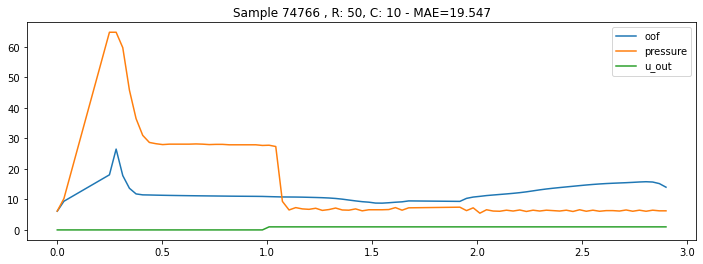

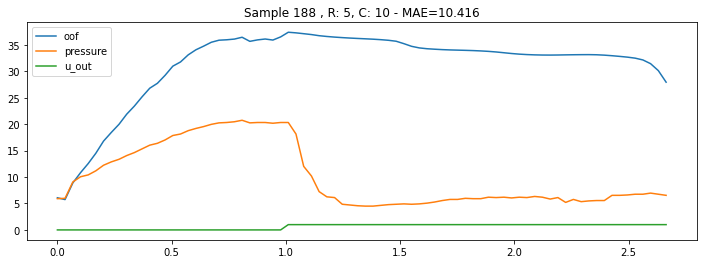

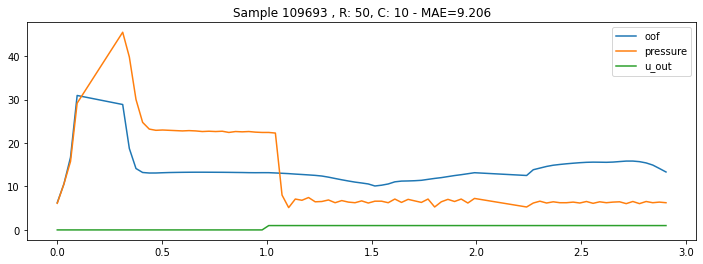

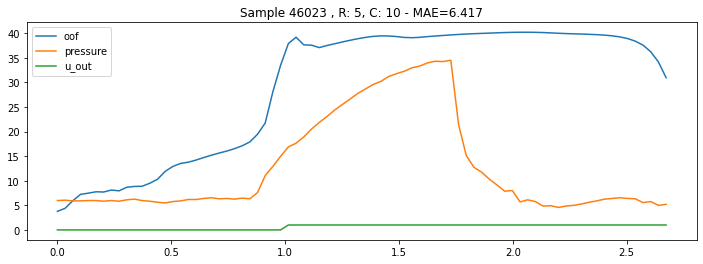

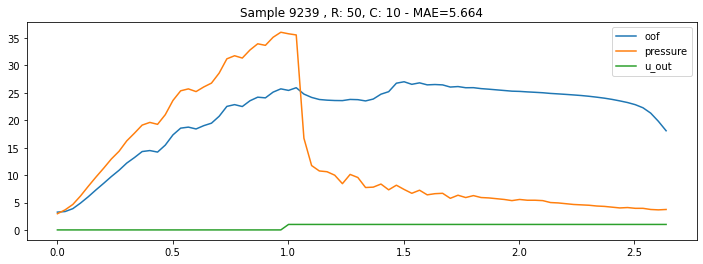

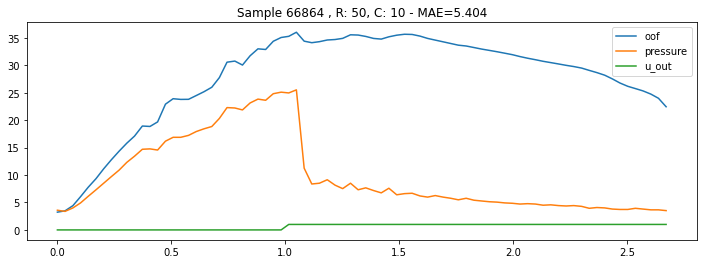

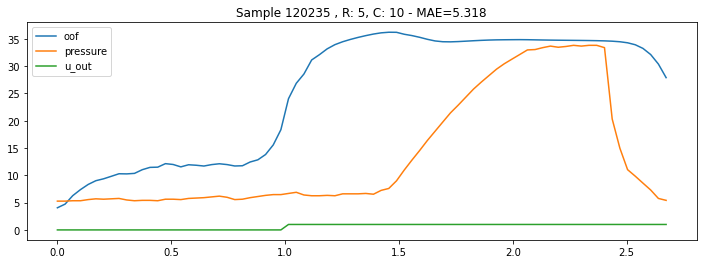

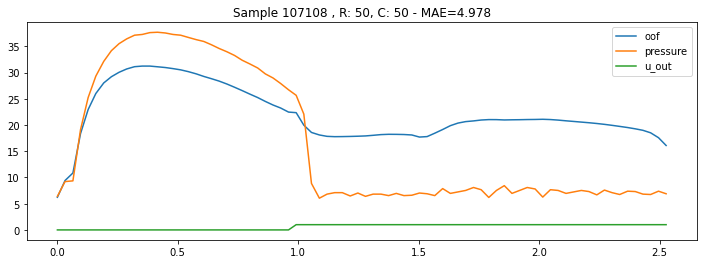

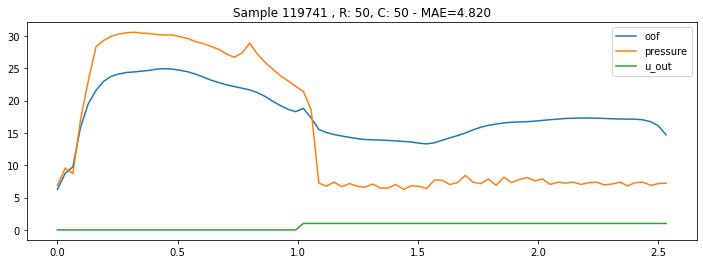

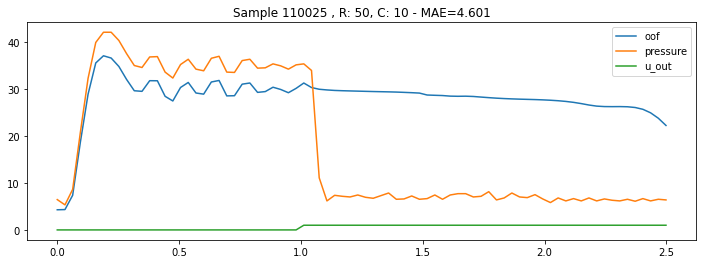

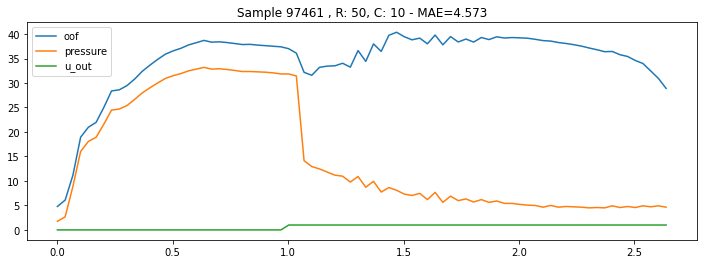

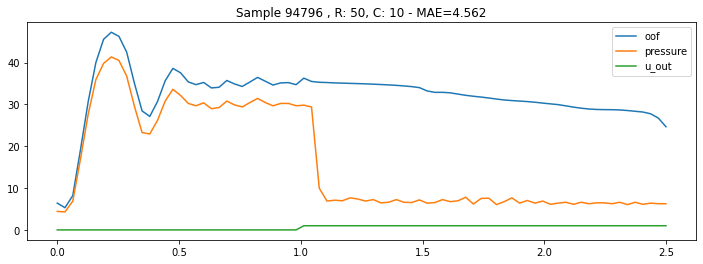

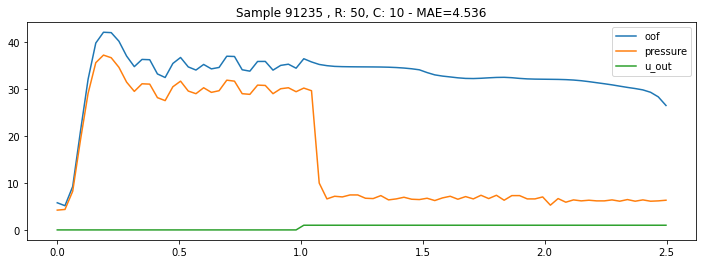

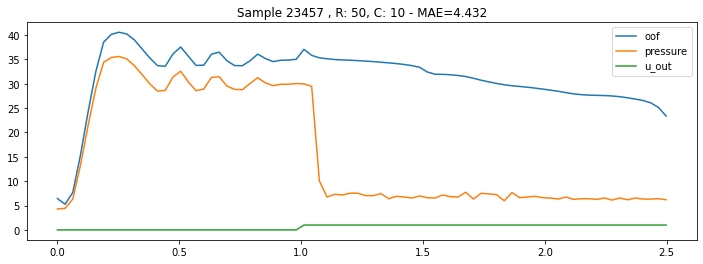

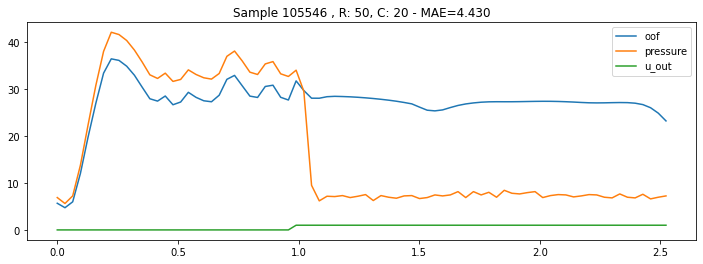

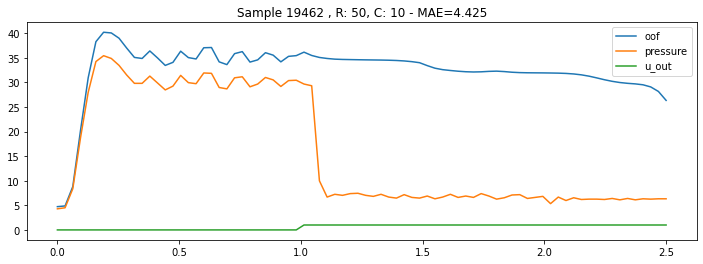

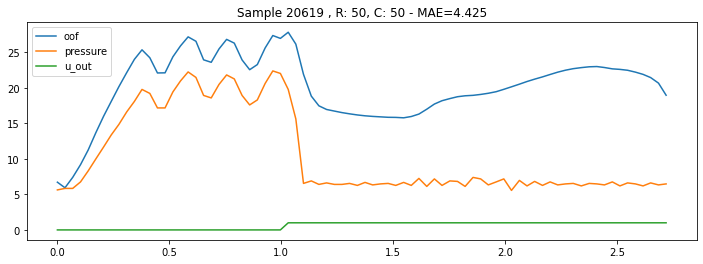

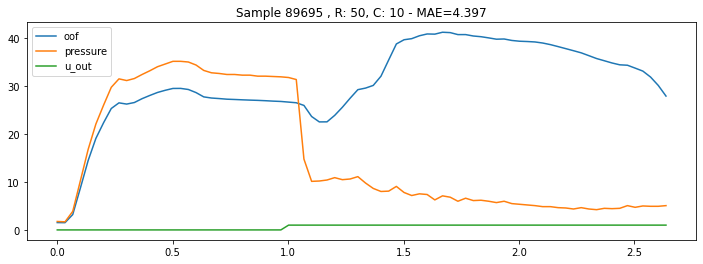

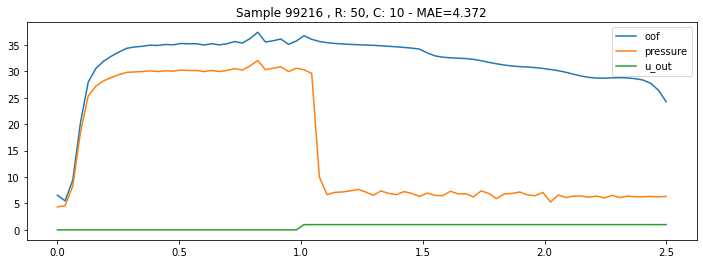

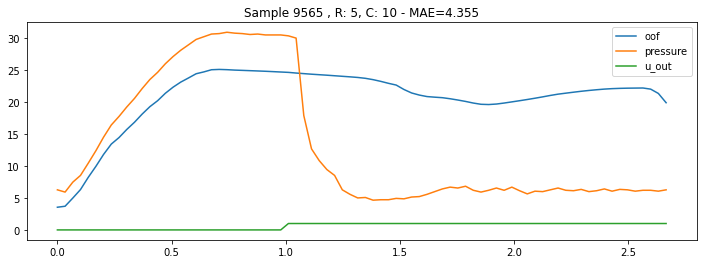

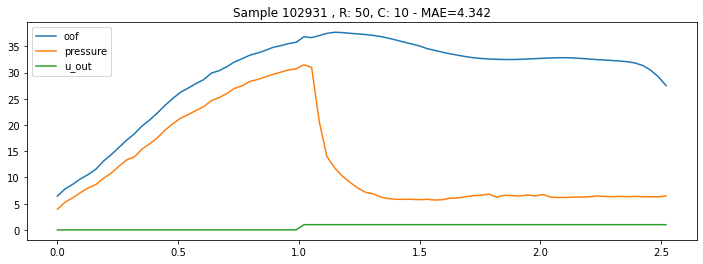

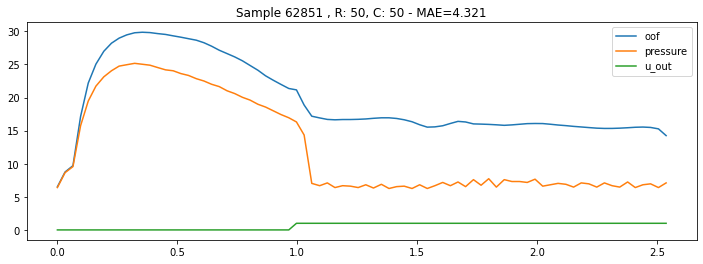

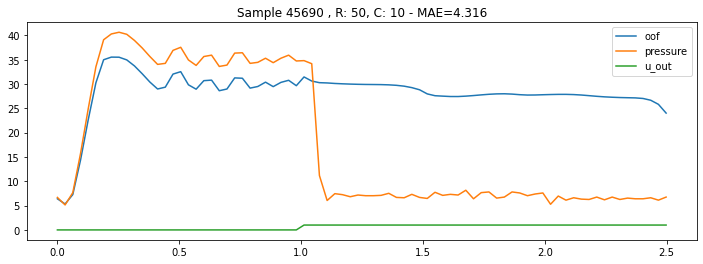

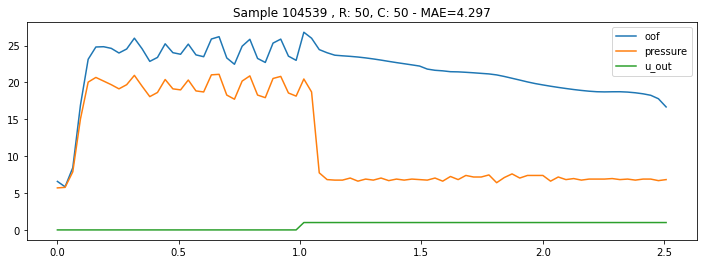

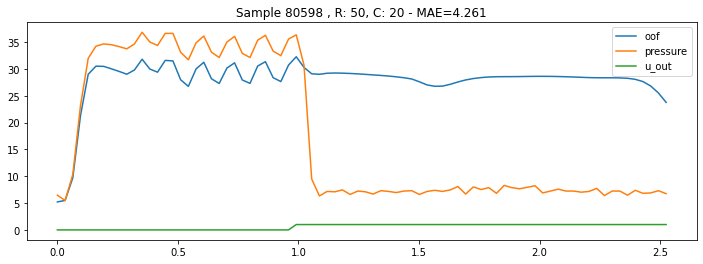

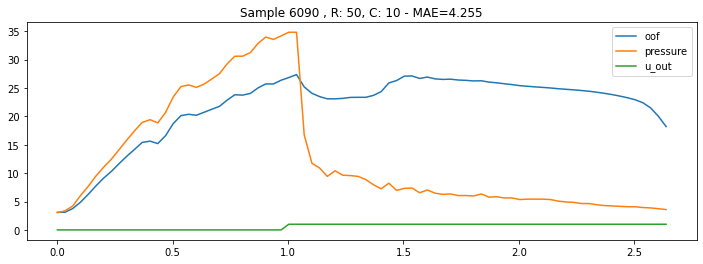

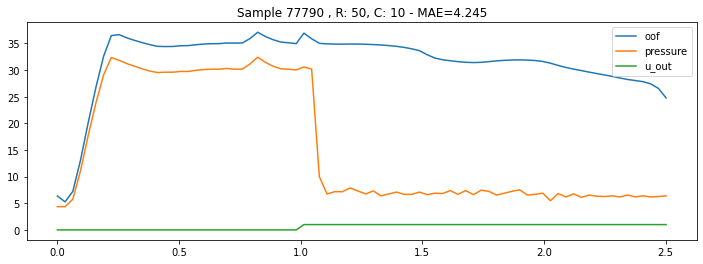

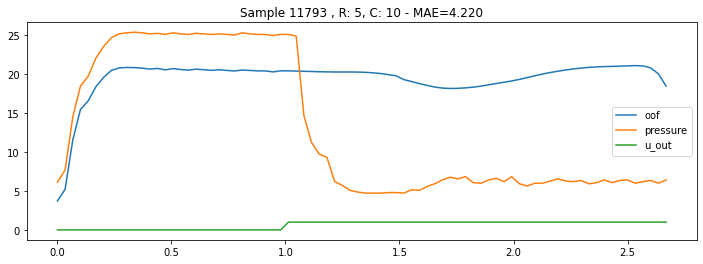

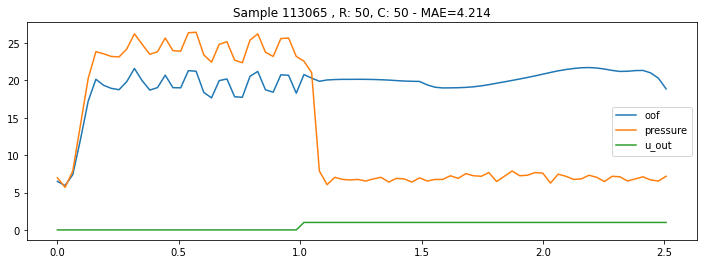

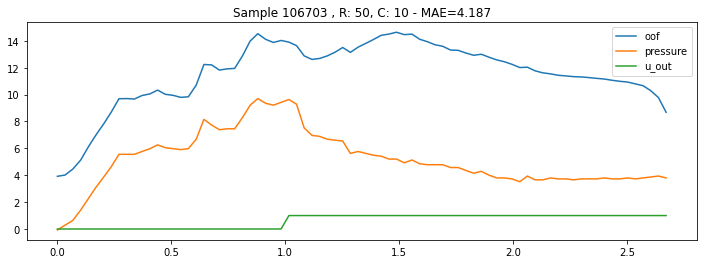

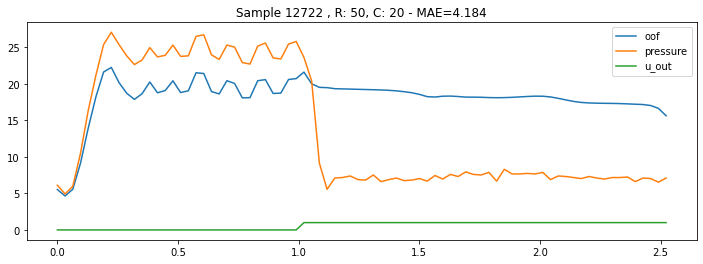

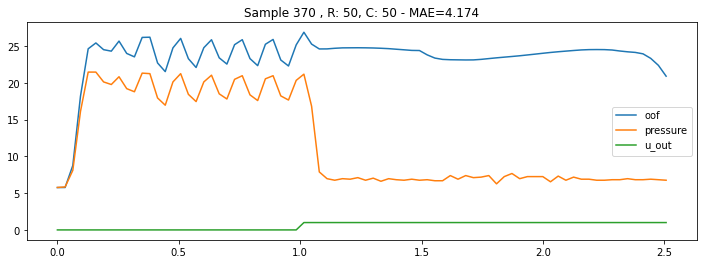

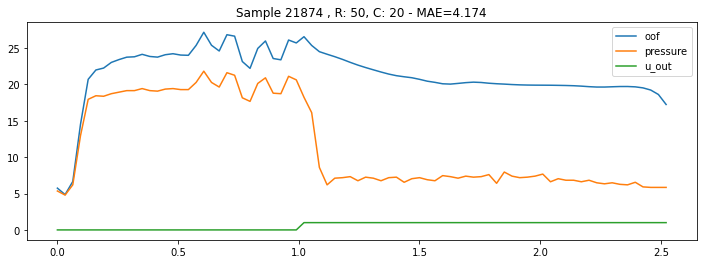

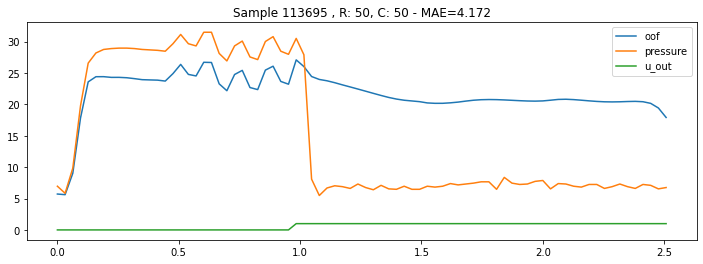

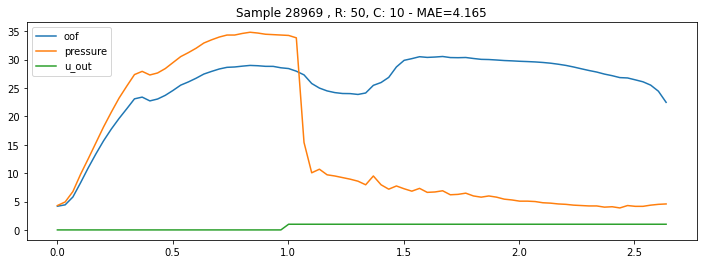

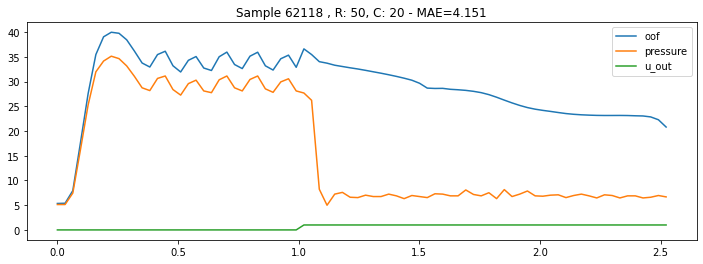

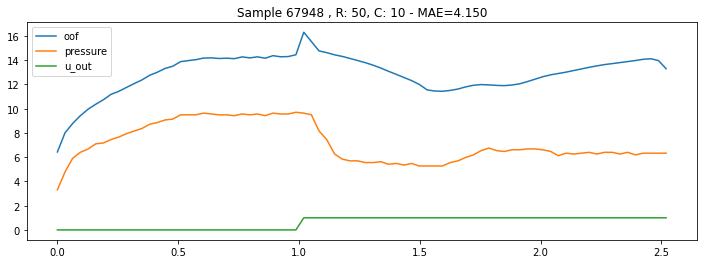

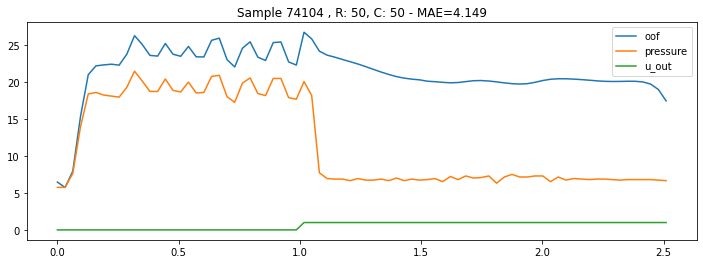

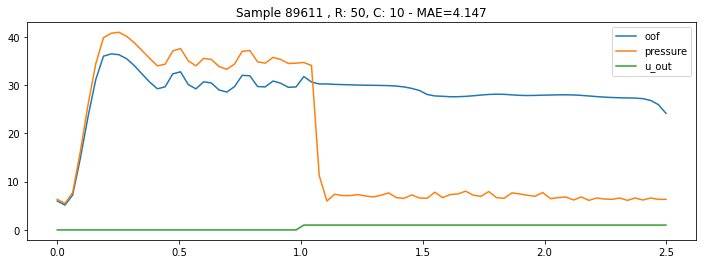

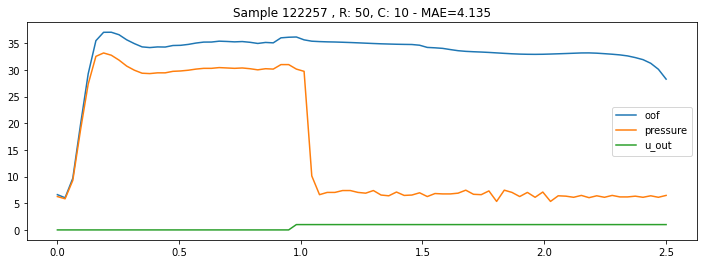

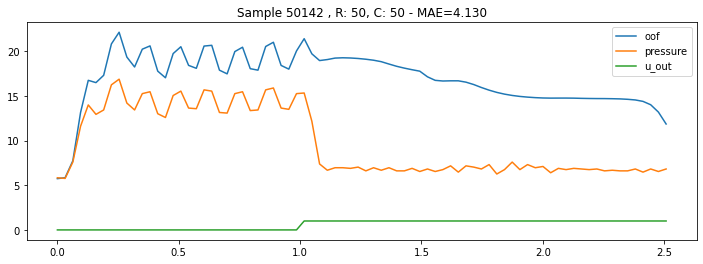

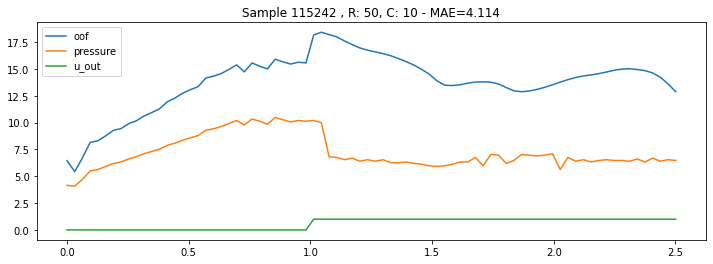

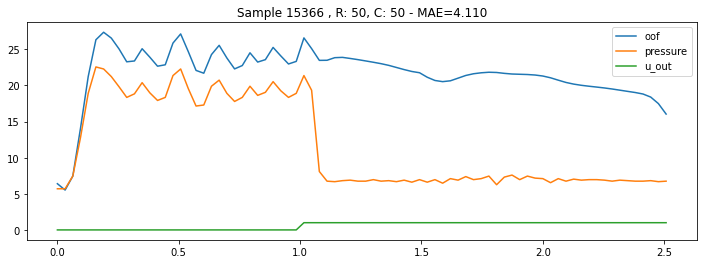

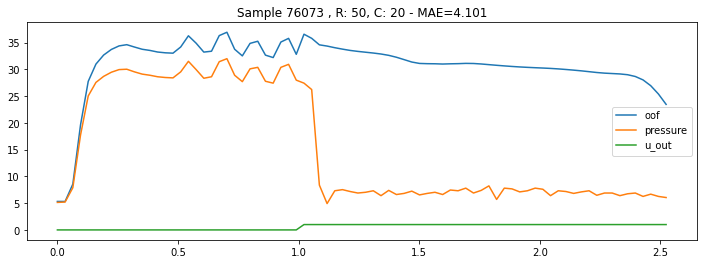

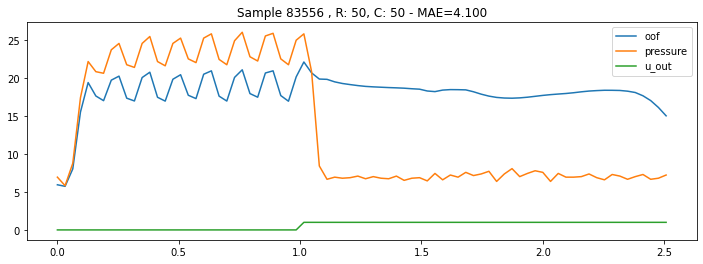

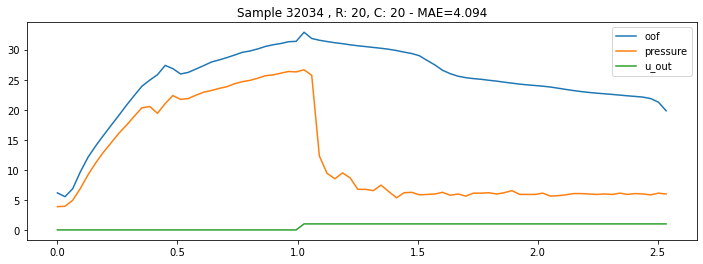

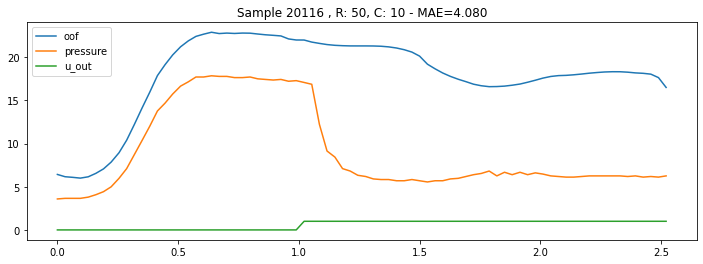

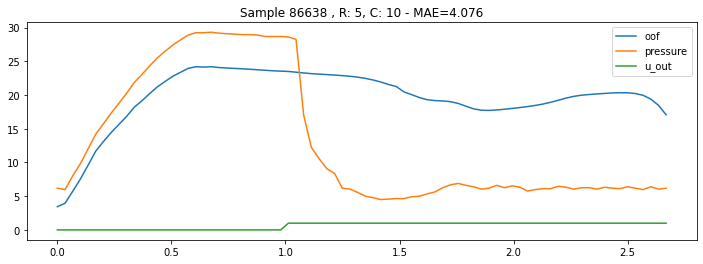

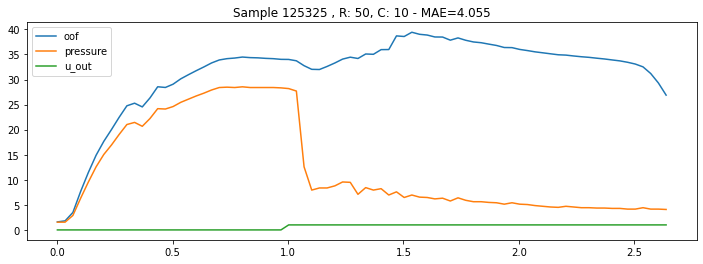

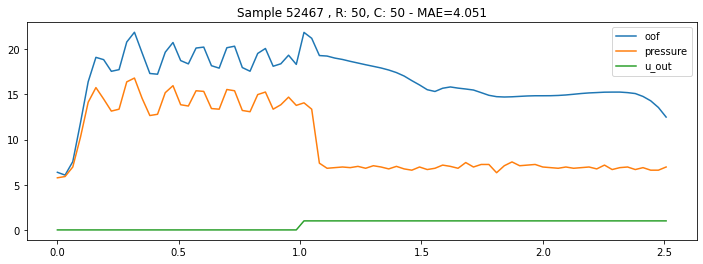

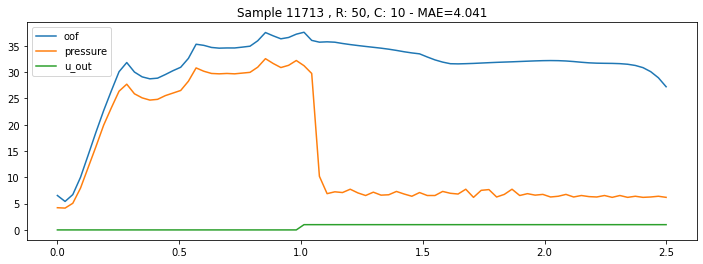

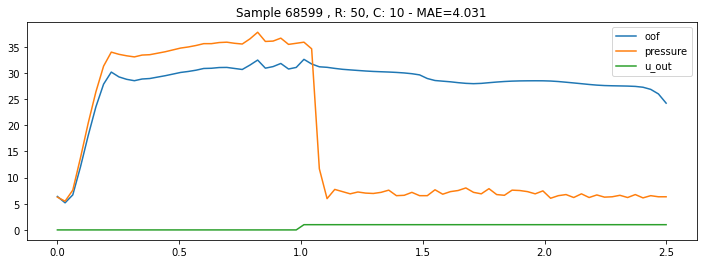

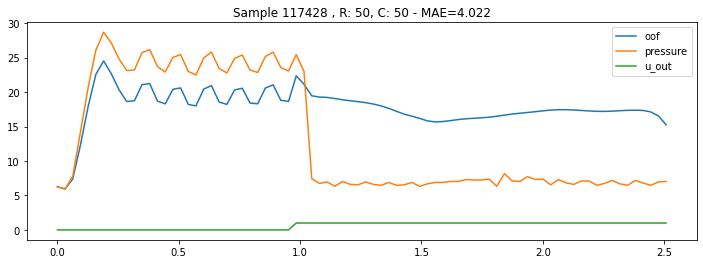

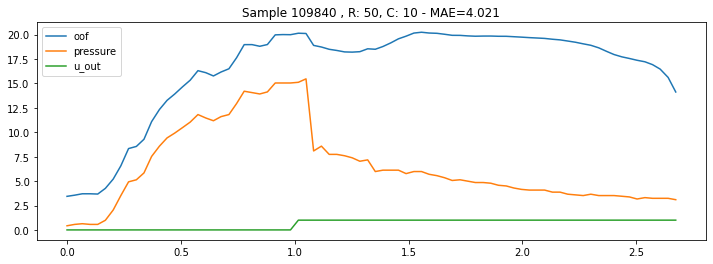

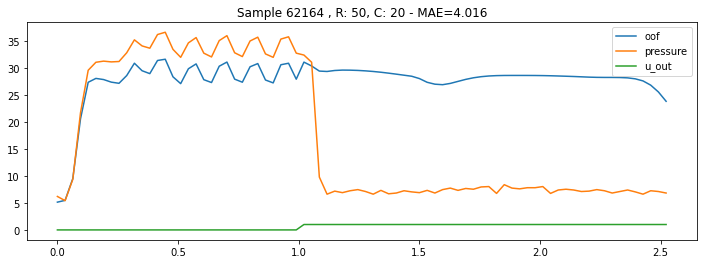

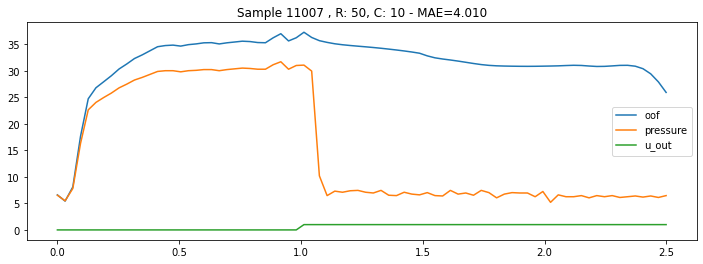

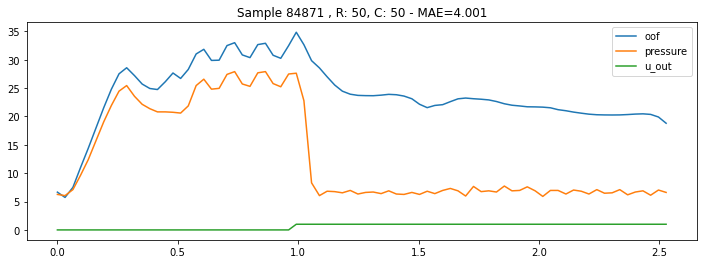

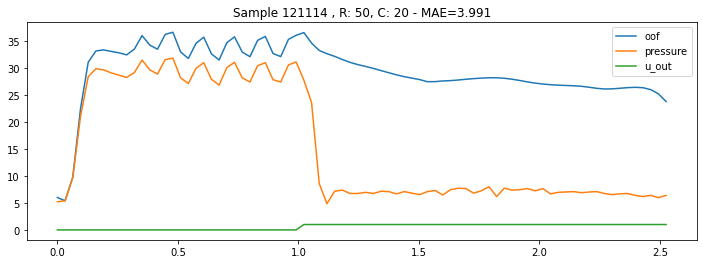

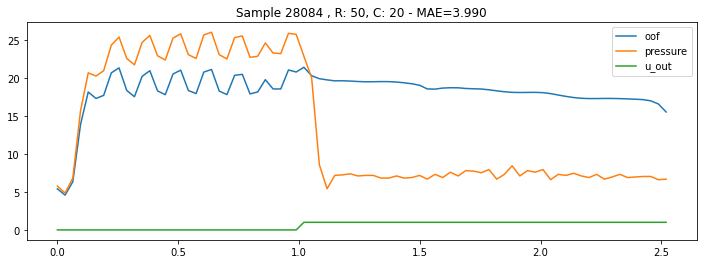

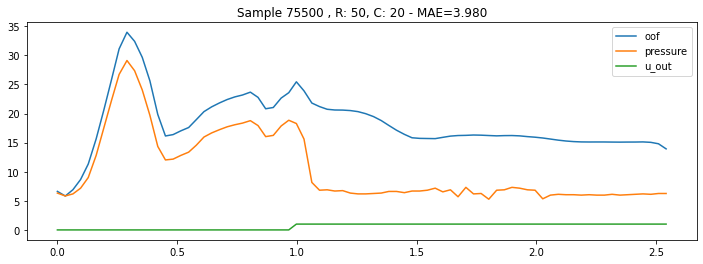

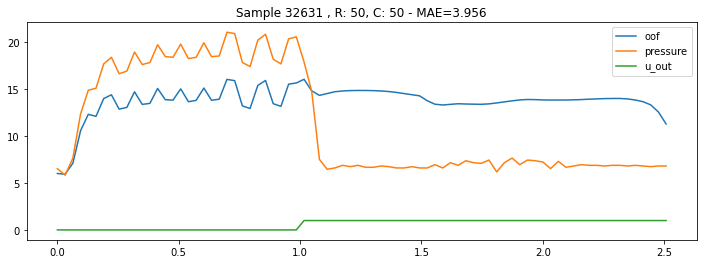

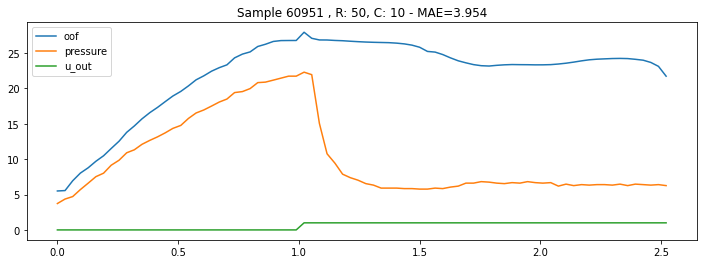

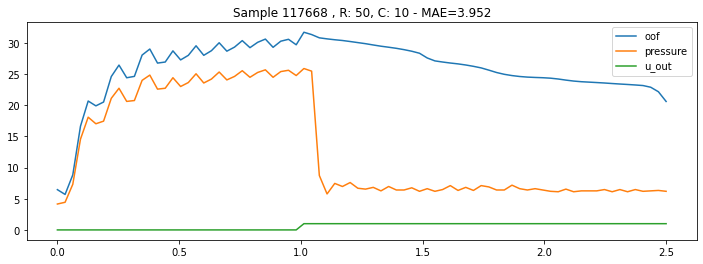

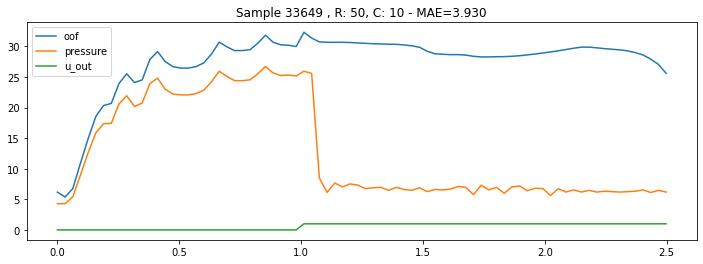

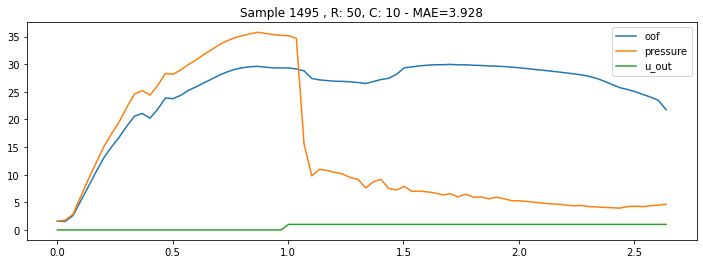

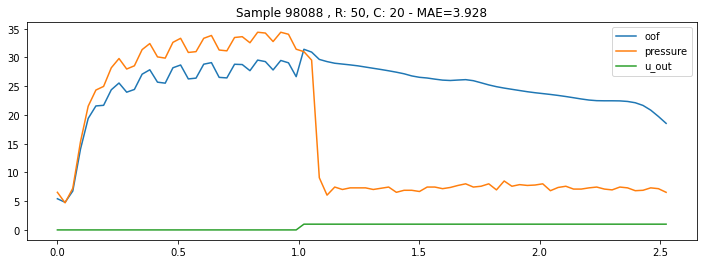

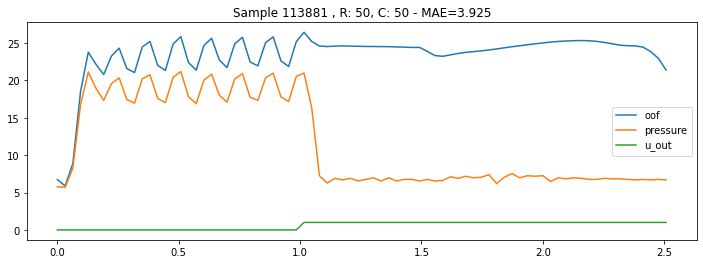

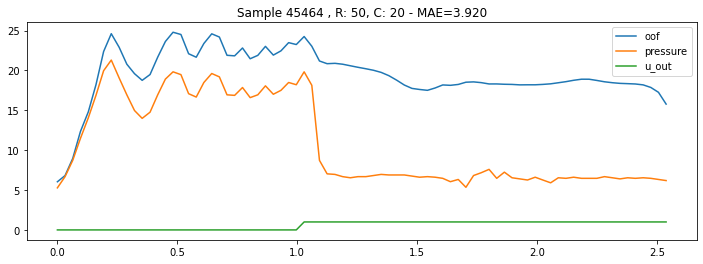

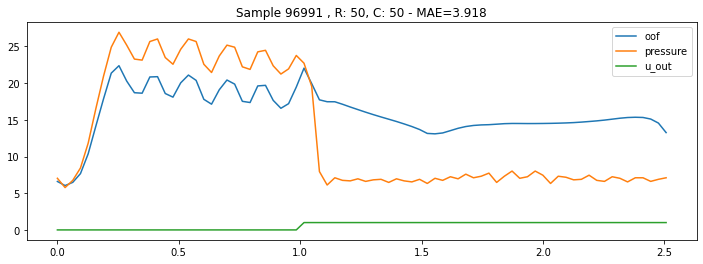

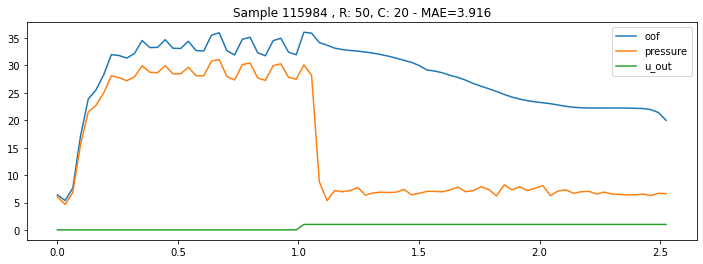

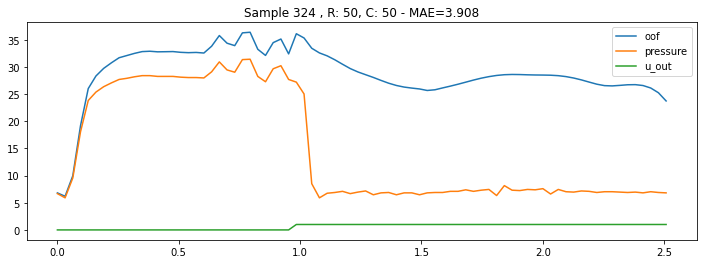

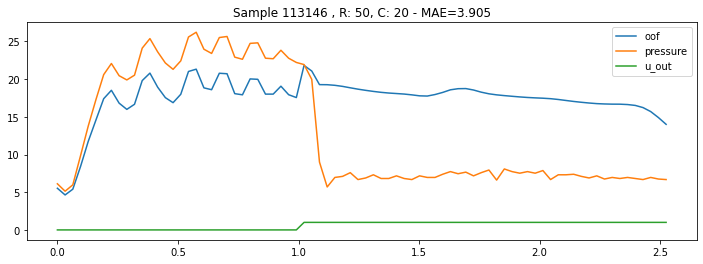

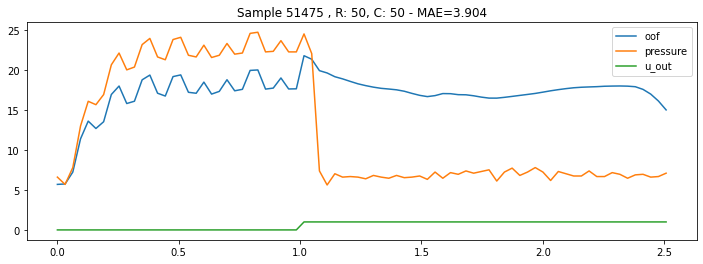

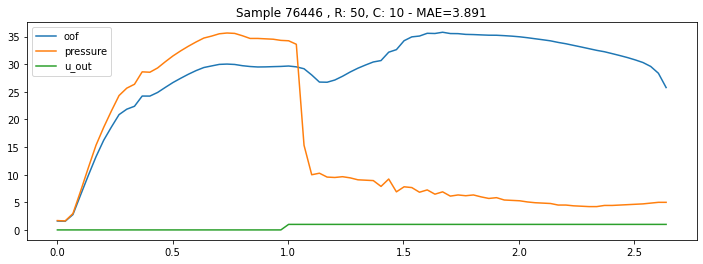

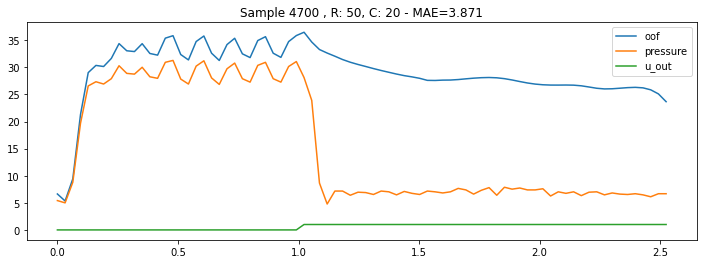

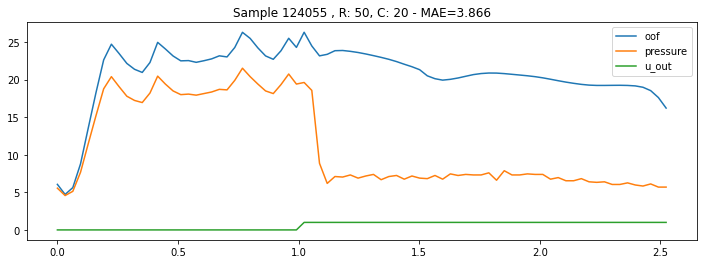

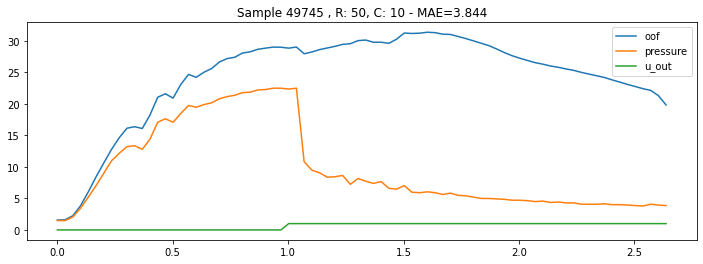

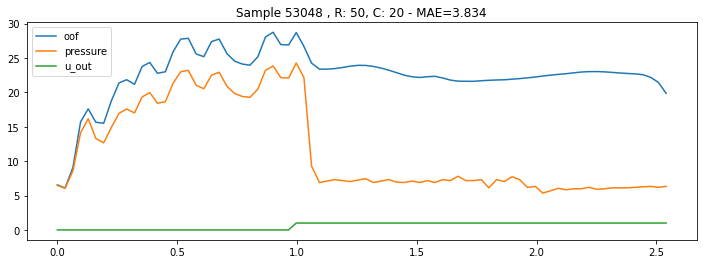

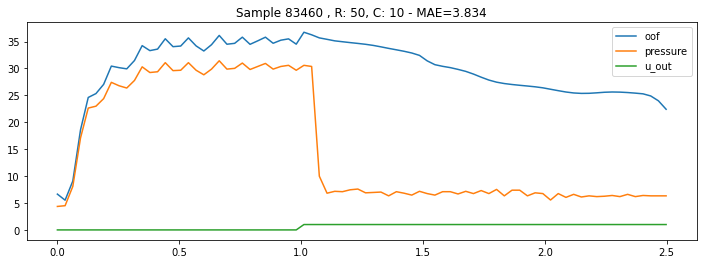

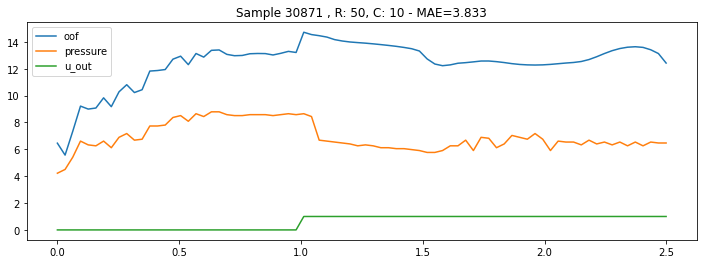

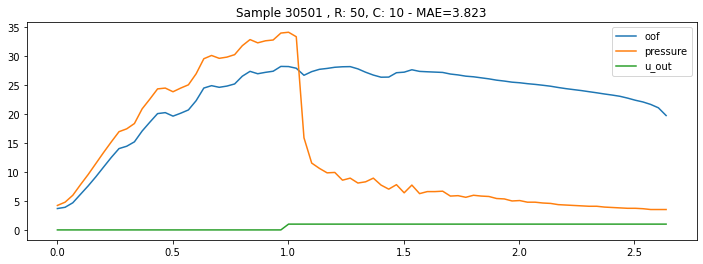

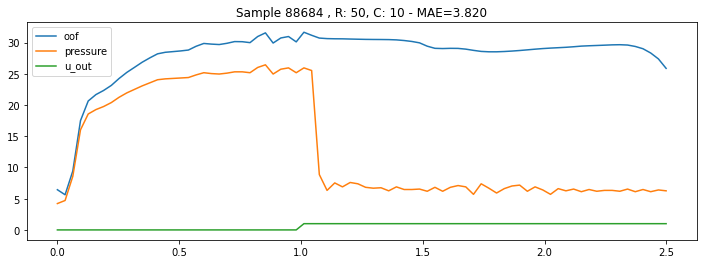

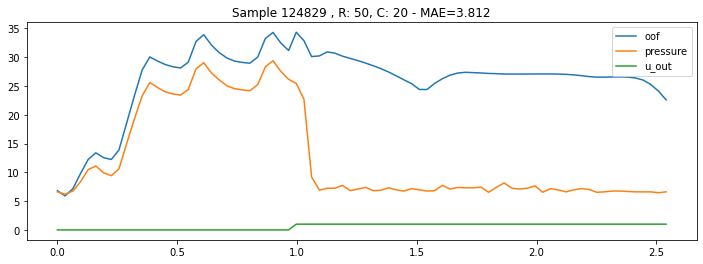

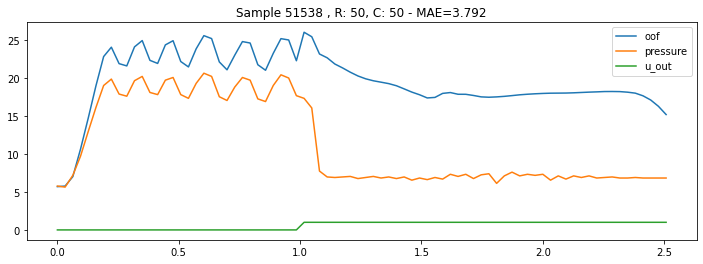

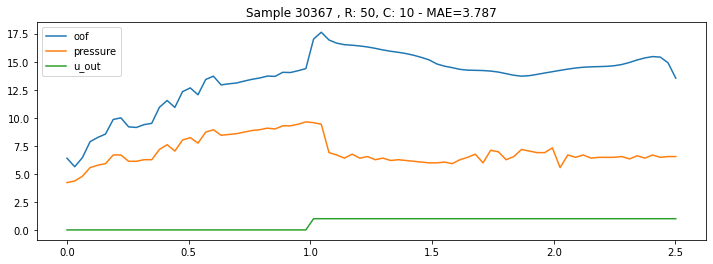

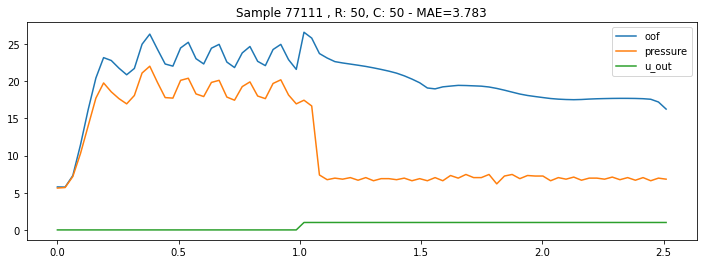

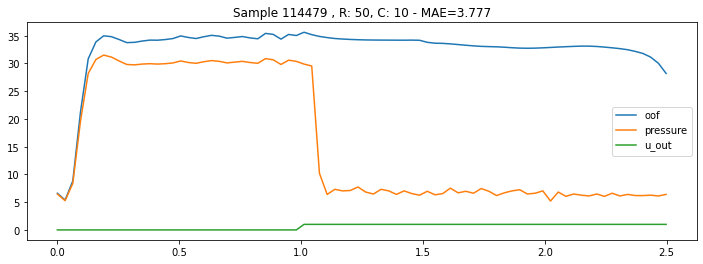

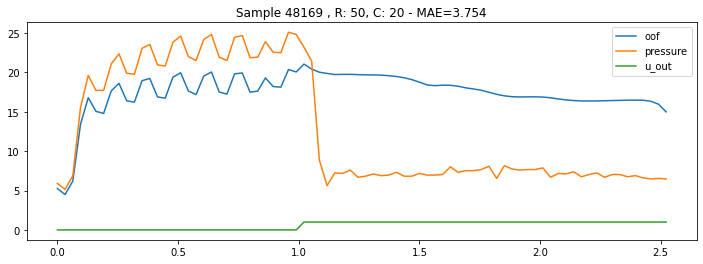

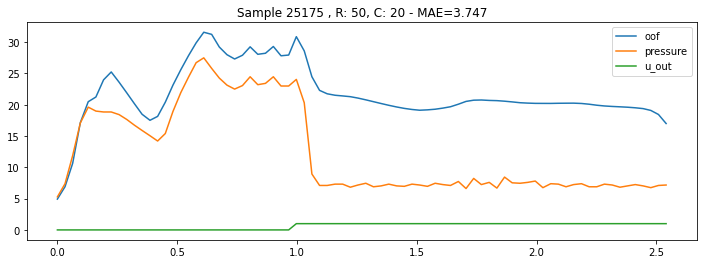

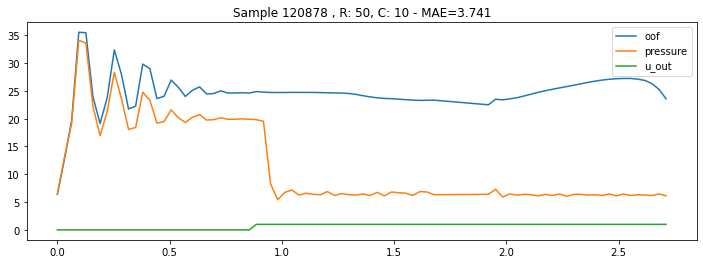

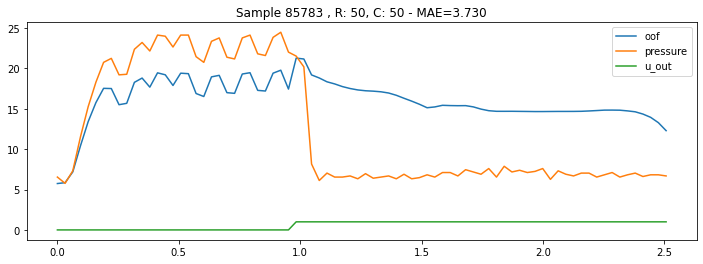

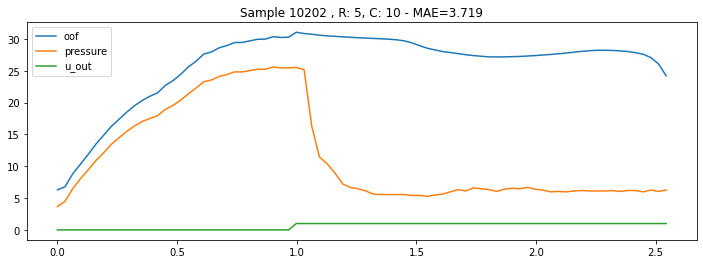

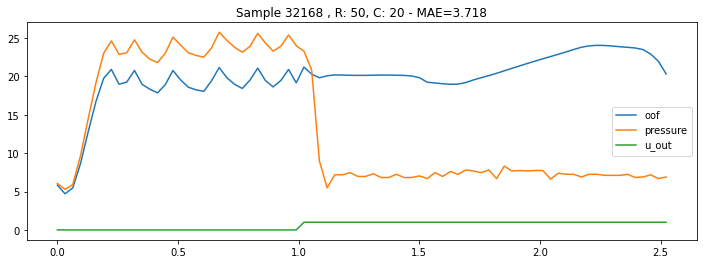

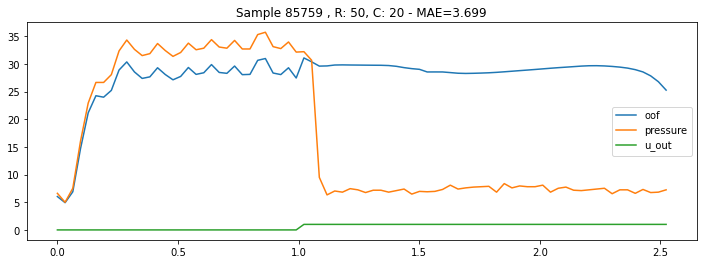

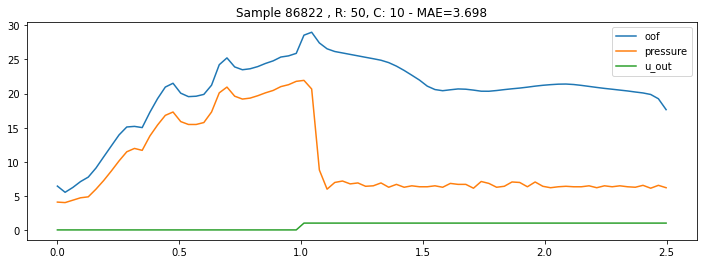

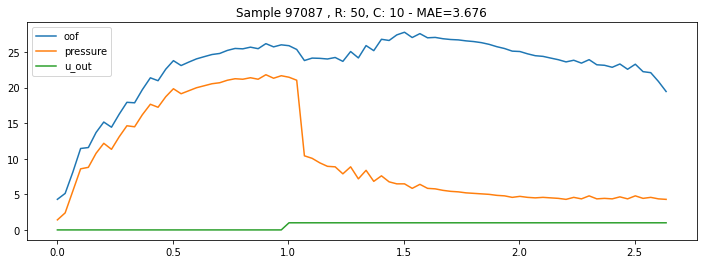

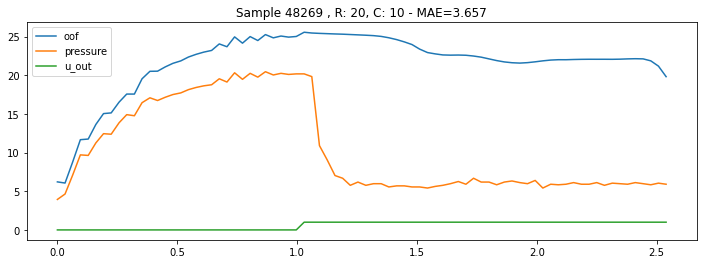

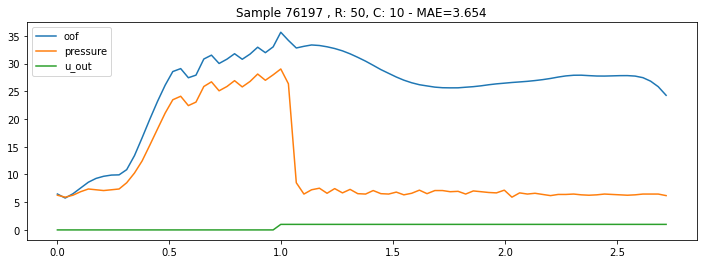

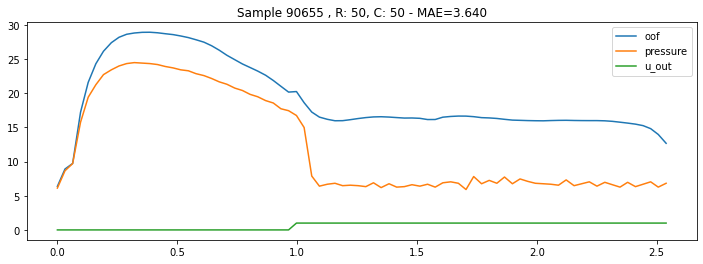

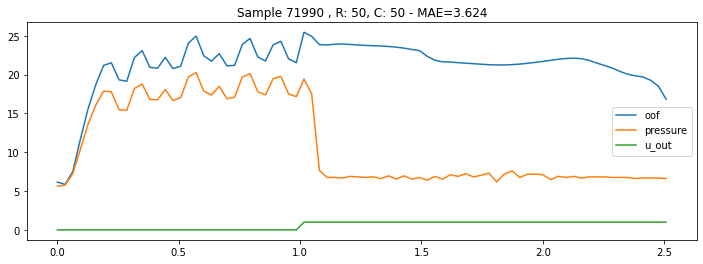

In [8]:
for id in breath_ids:
    plot_prediction(id,oof_preds)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


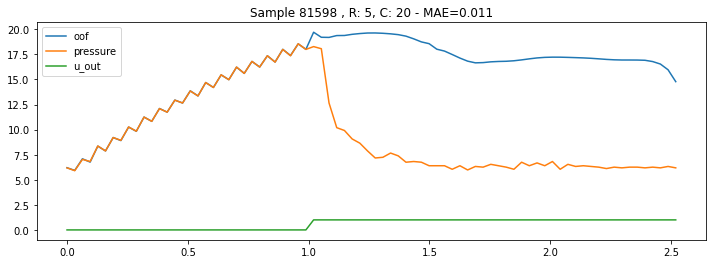

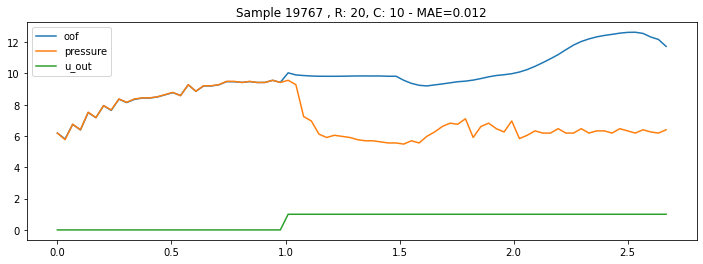

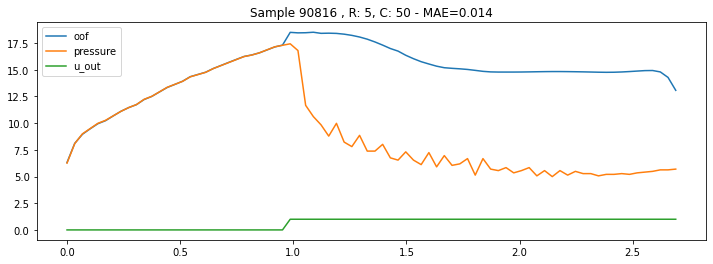

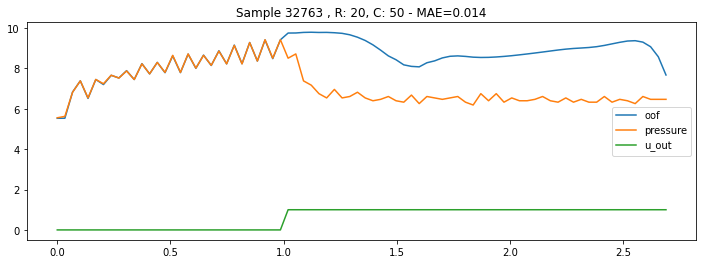

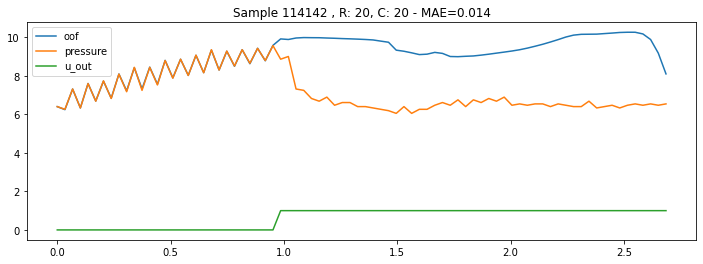

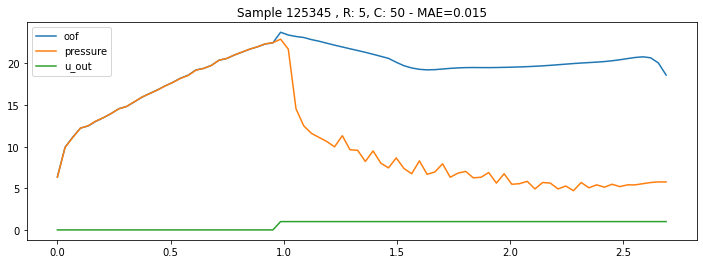

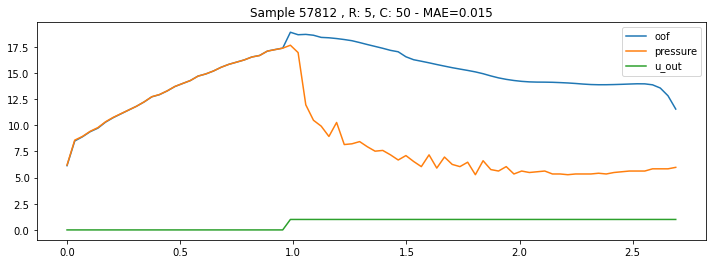

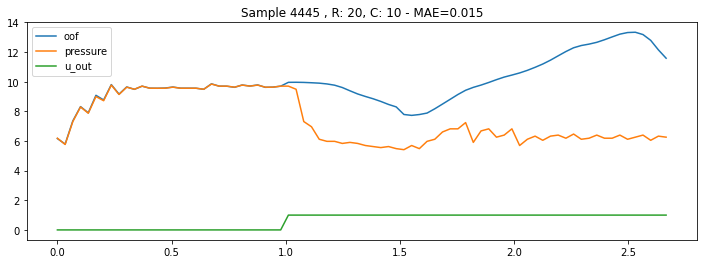

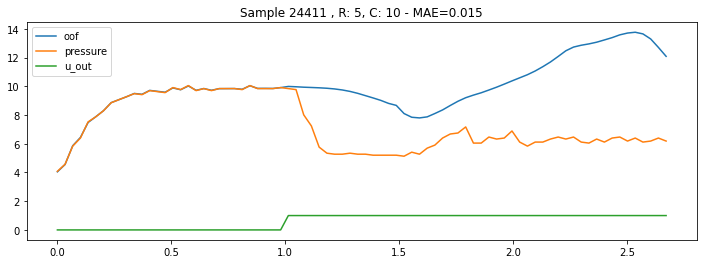

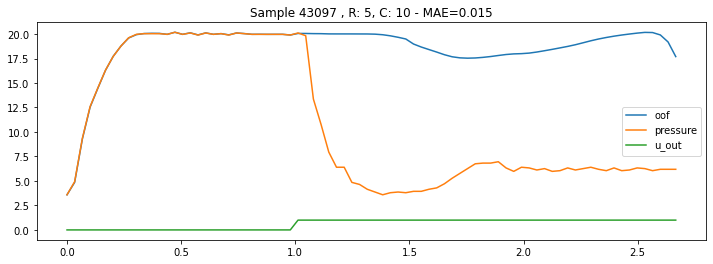

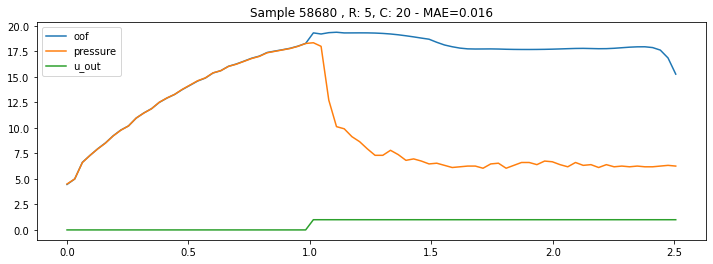

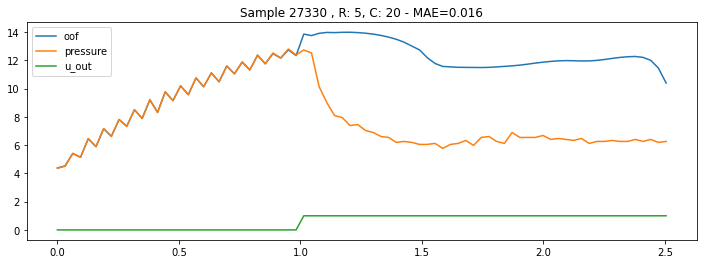

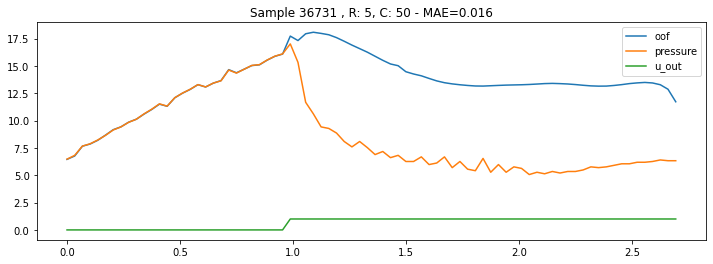

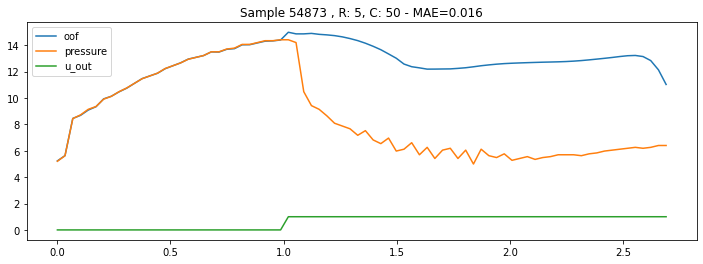

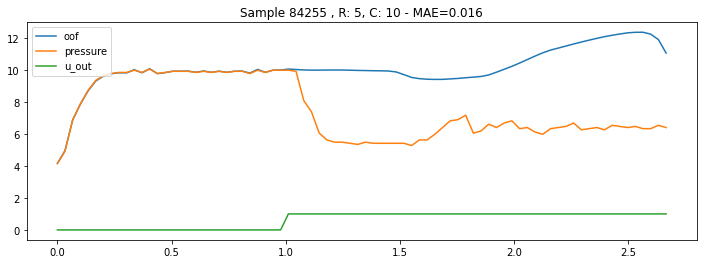

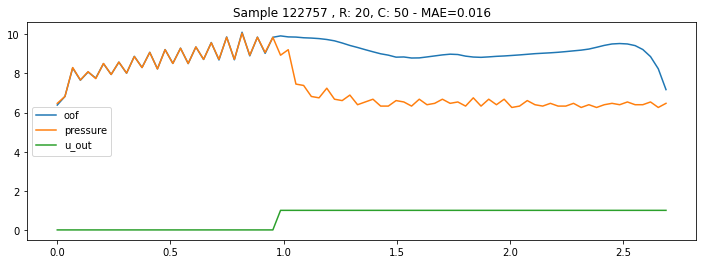

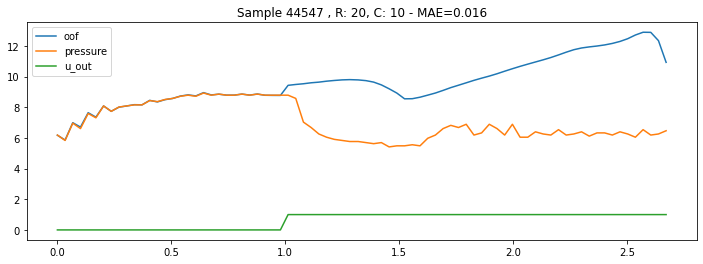

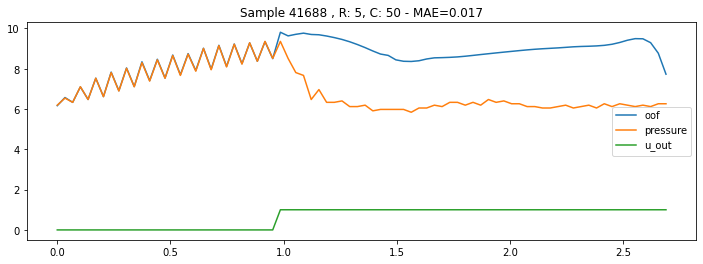

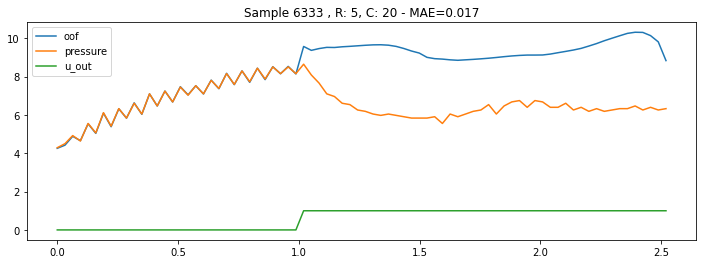

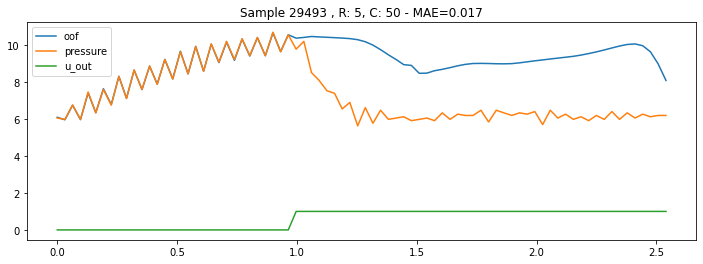

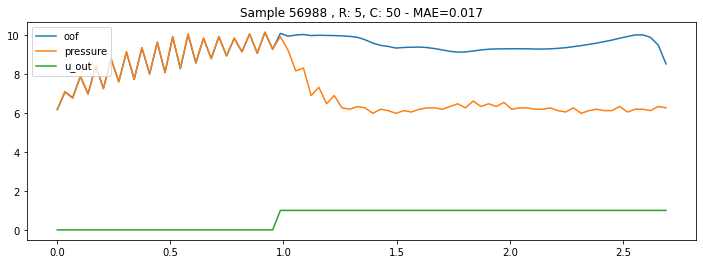

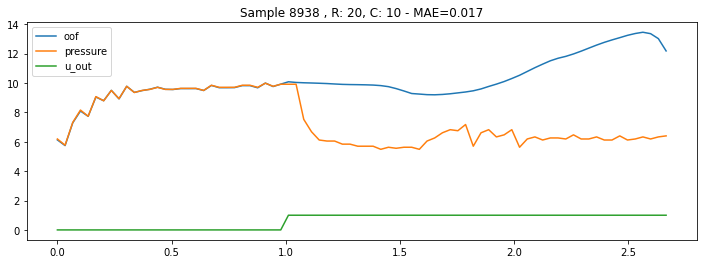

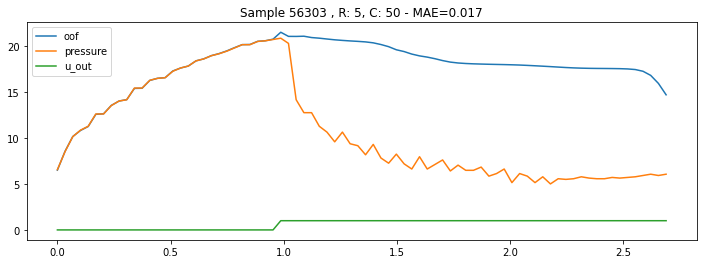

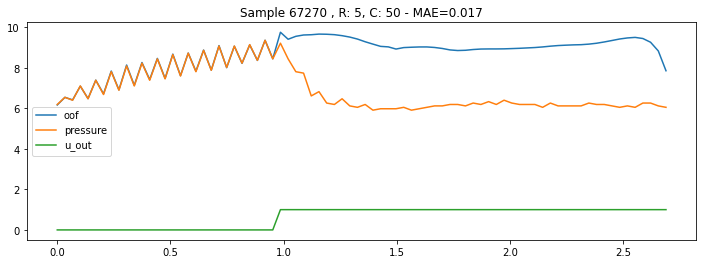

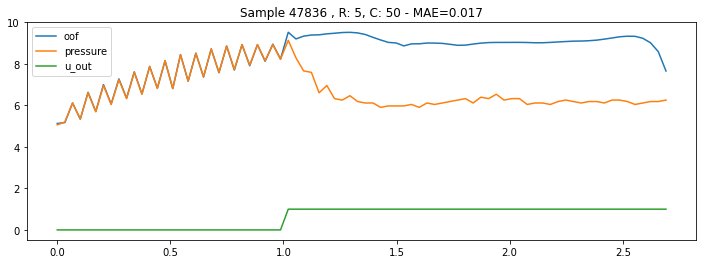

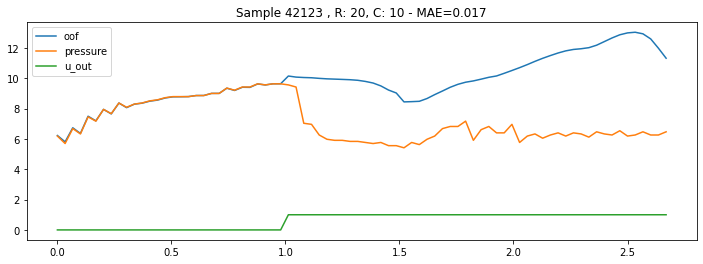

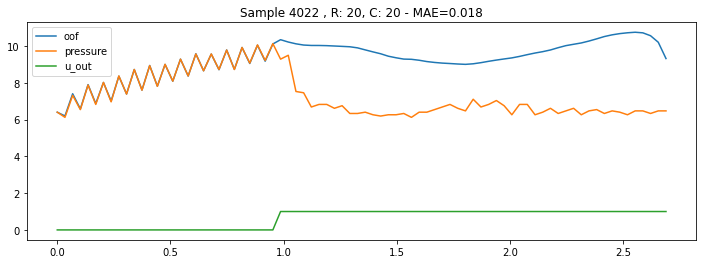

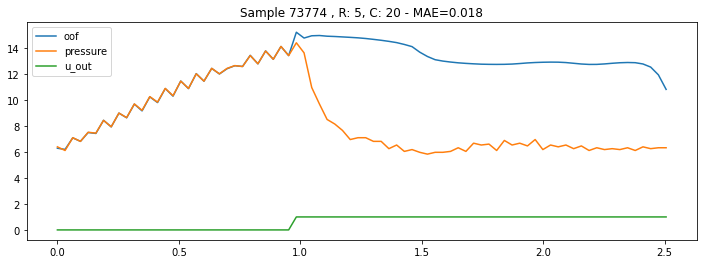

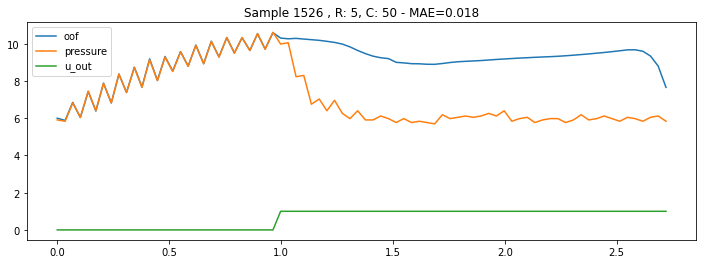

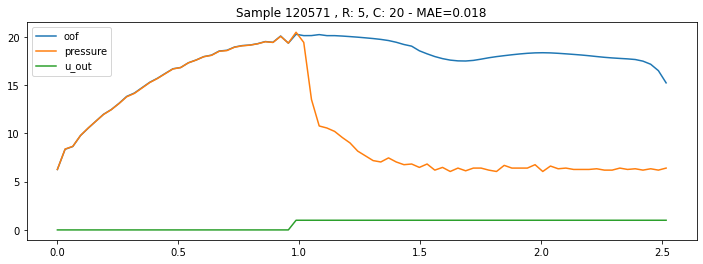

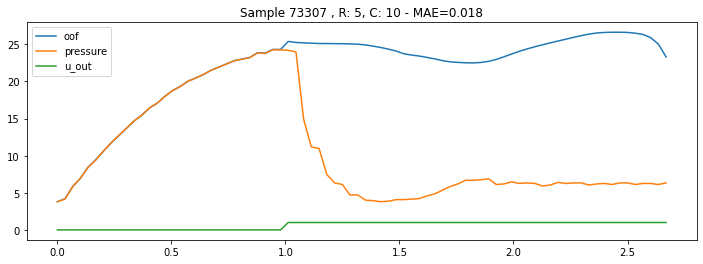

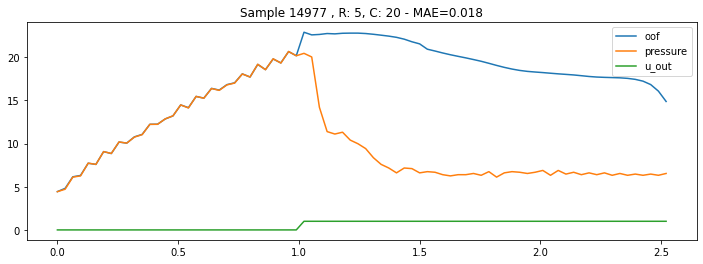

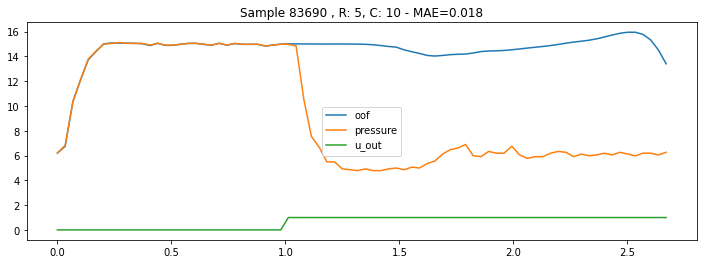

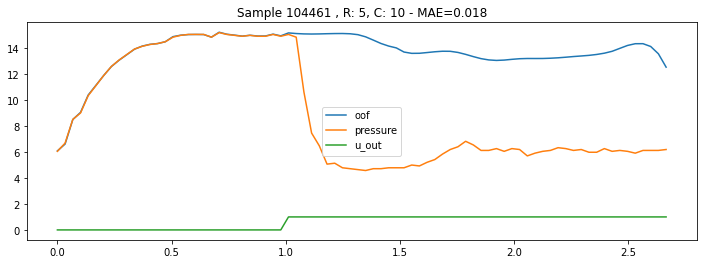

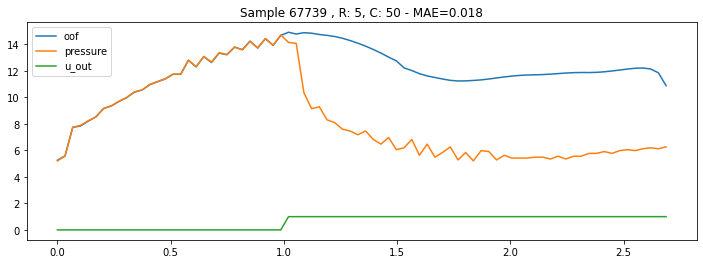

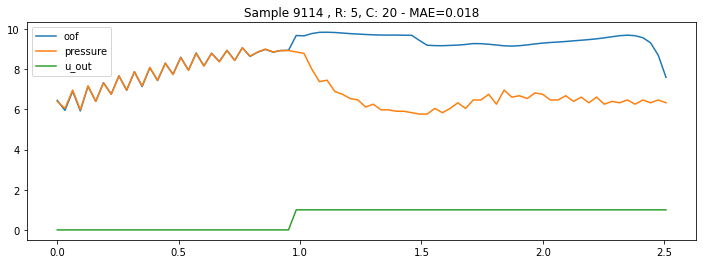

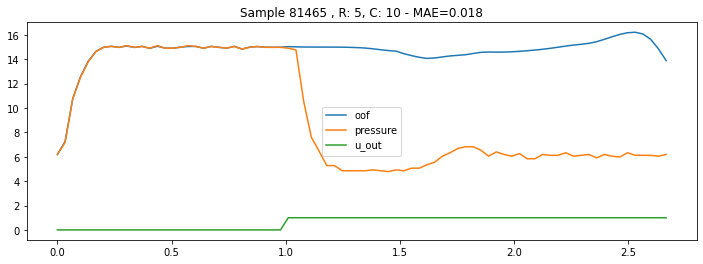

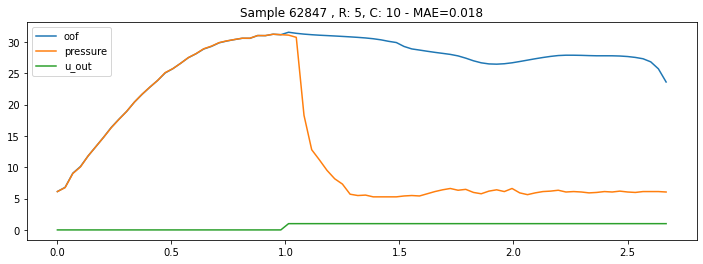

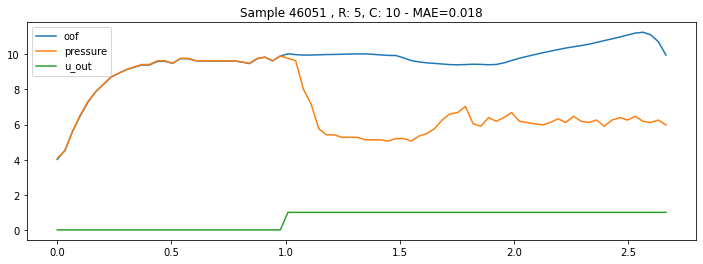

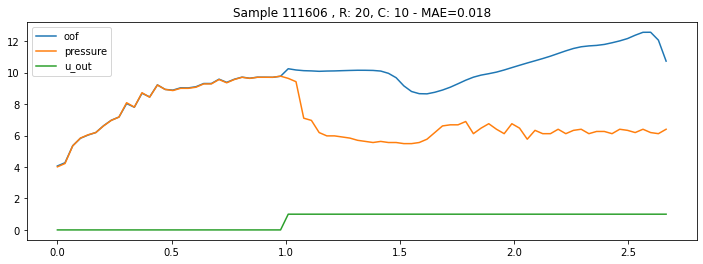

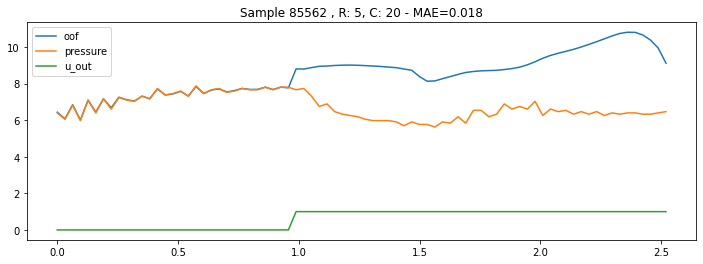

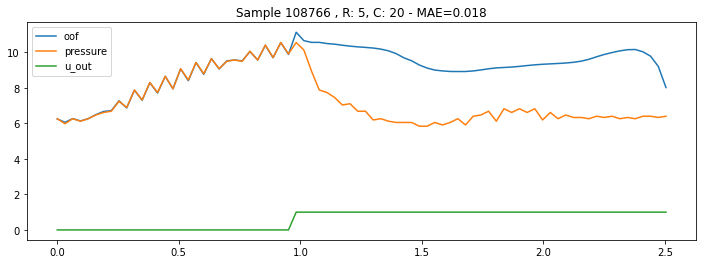

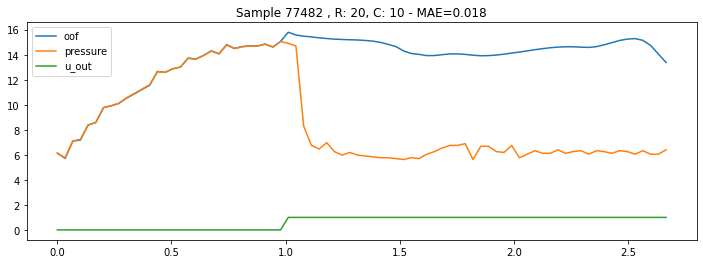

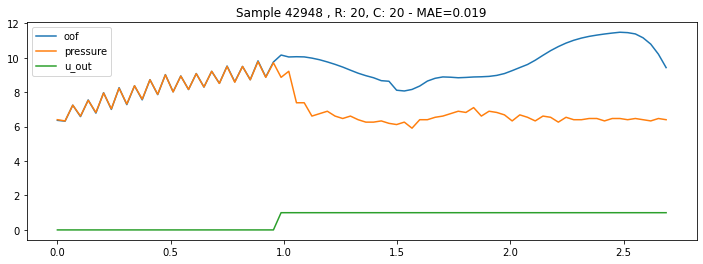

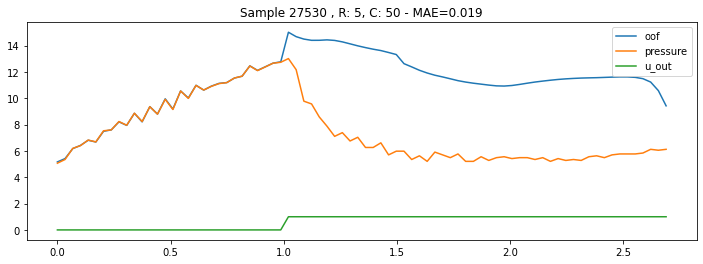

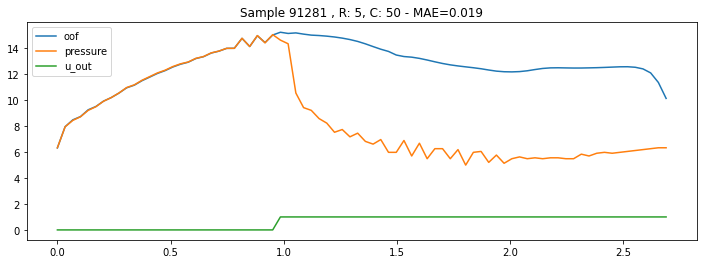

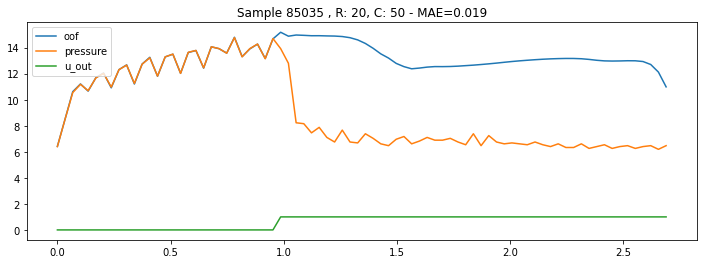

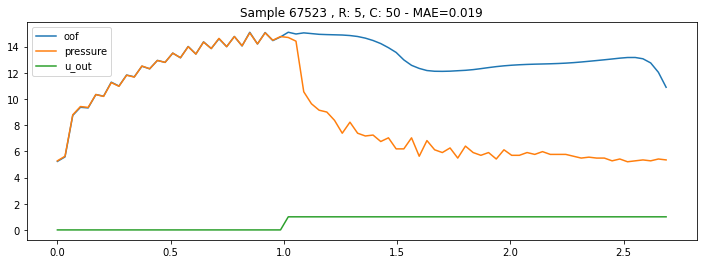

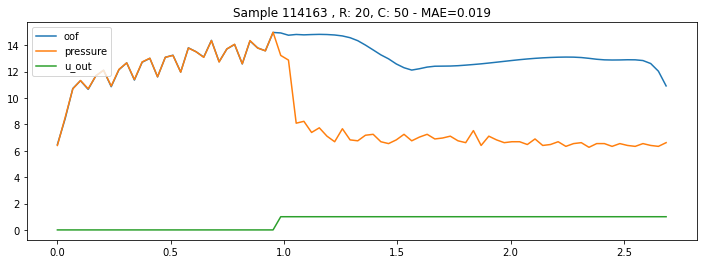

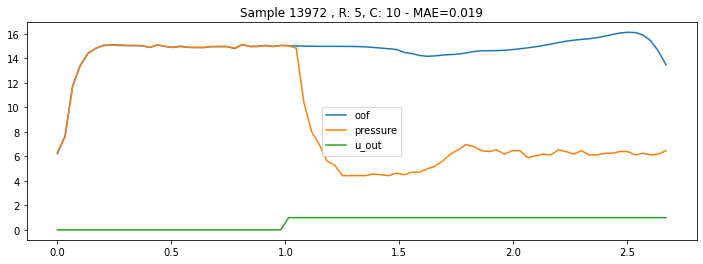

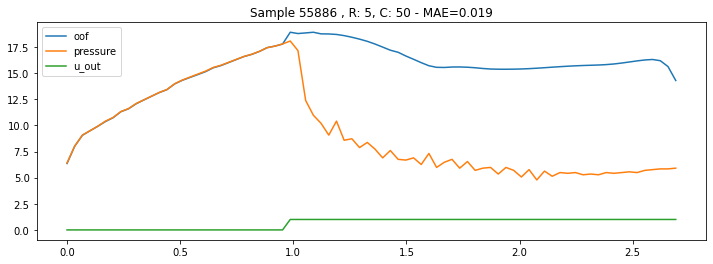

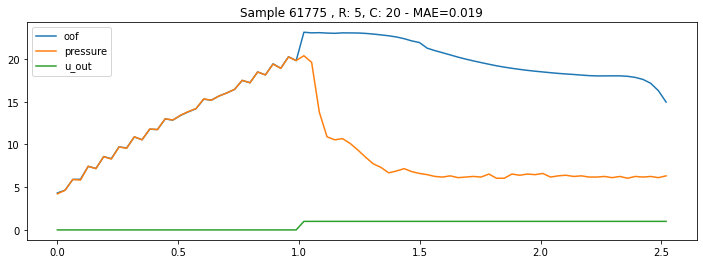

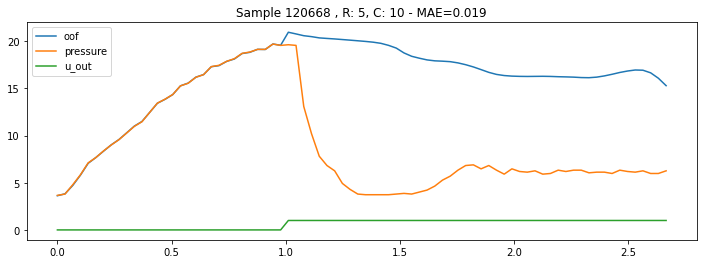

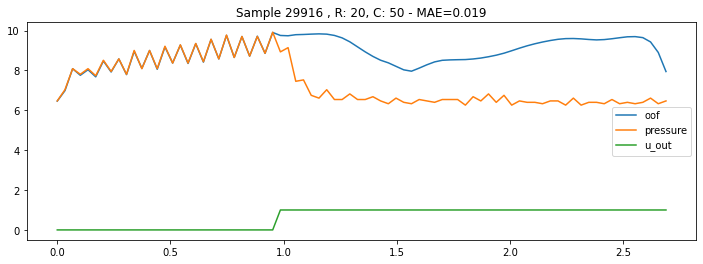

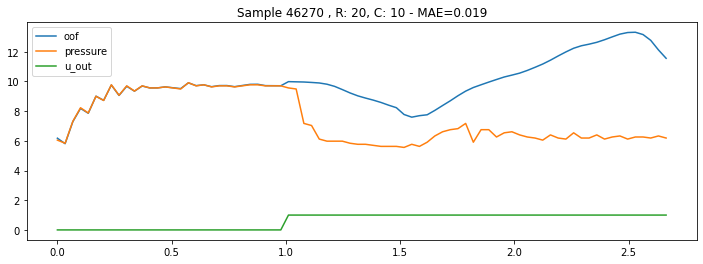

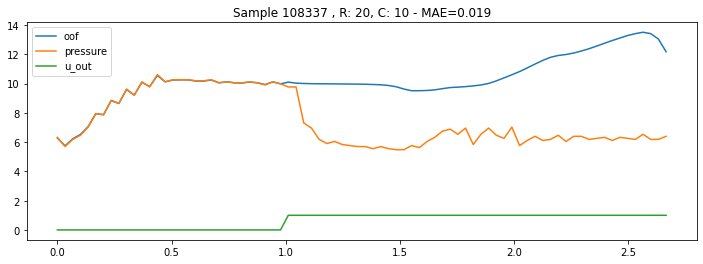

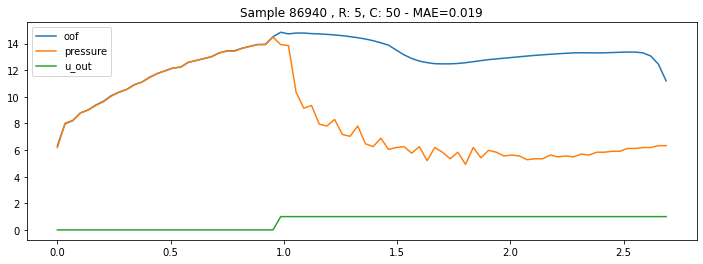

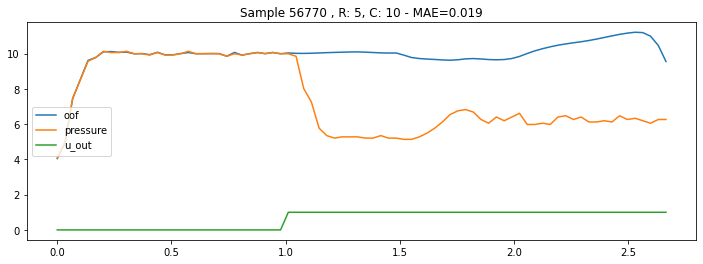

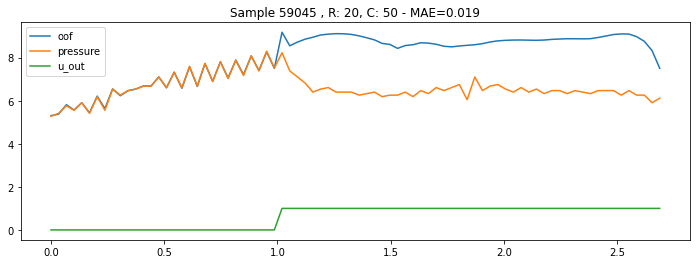

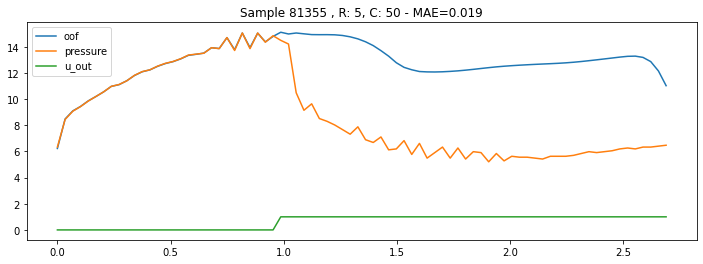

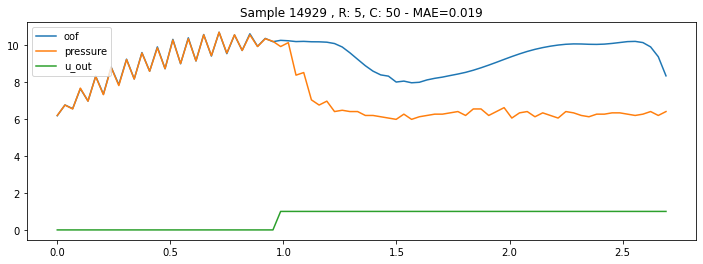

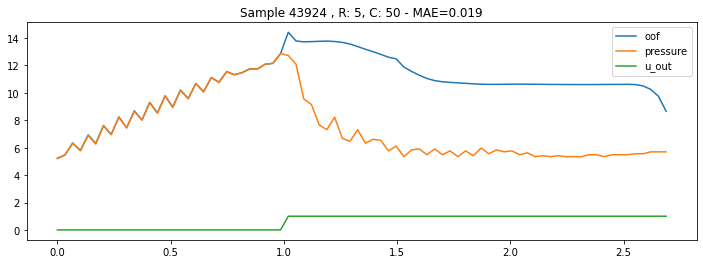

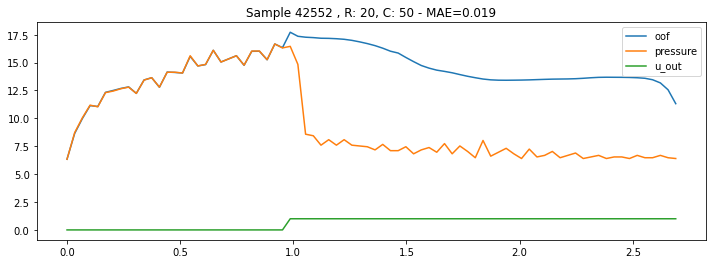

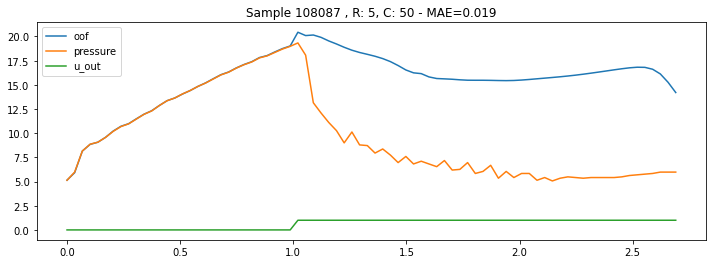

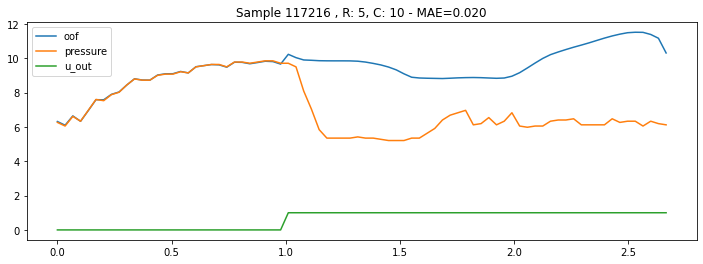

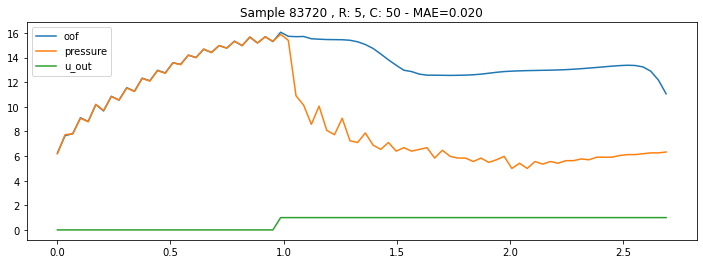

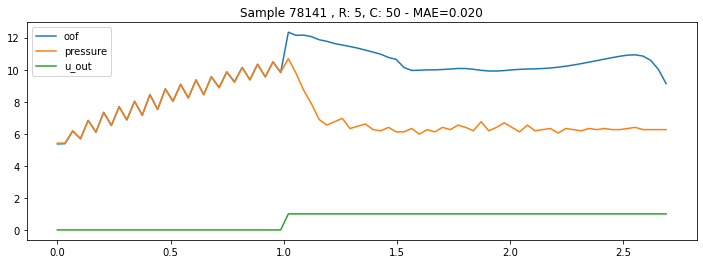

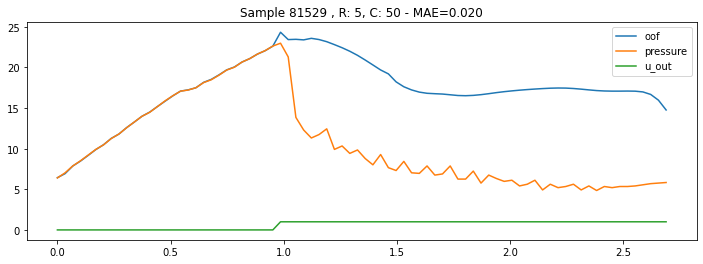

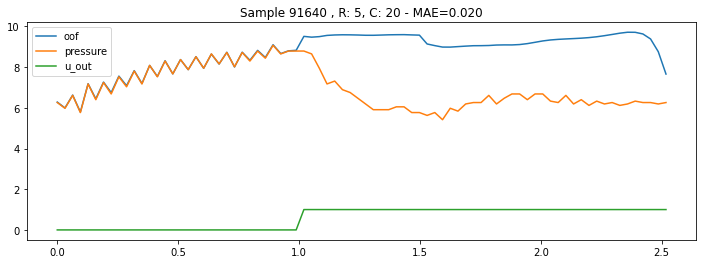

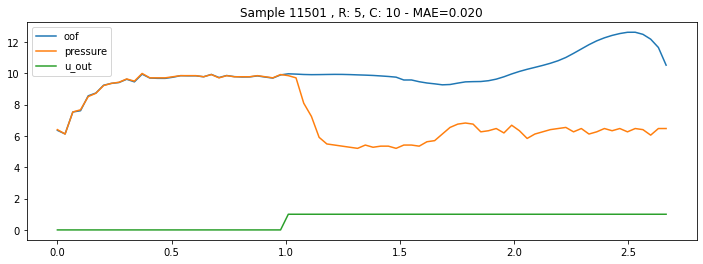

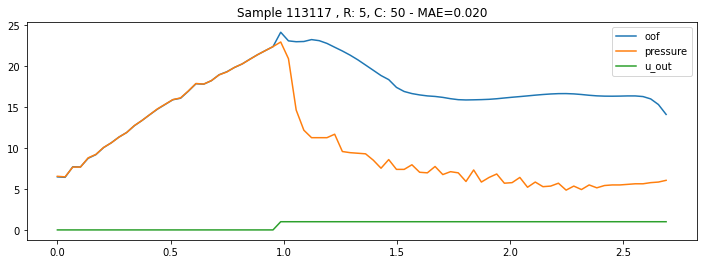

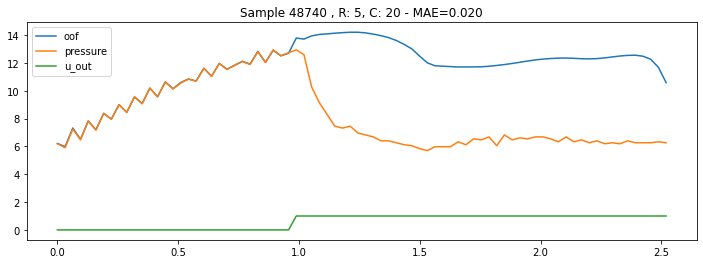

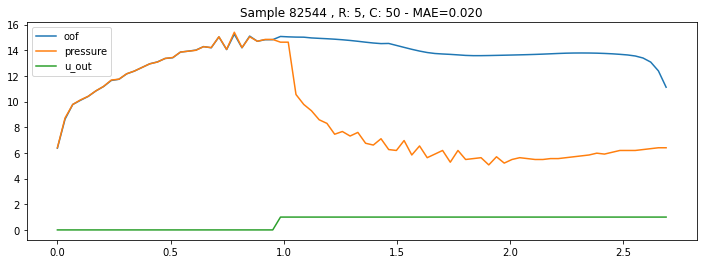

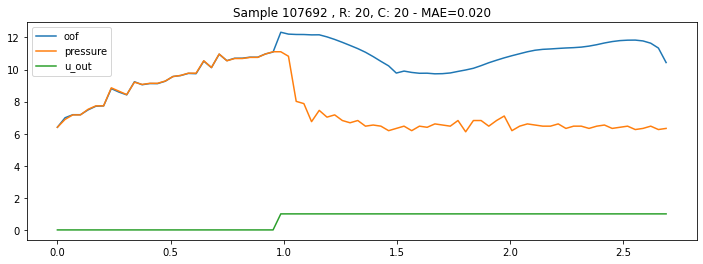

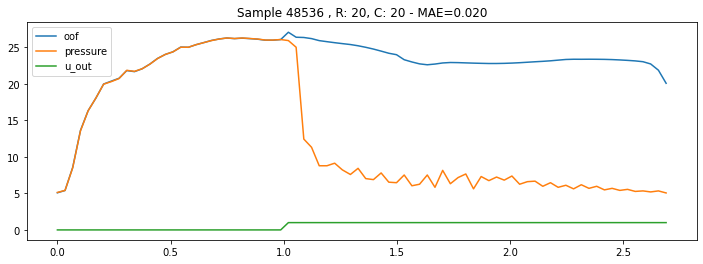

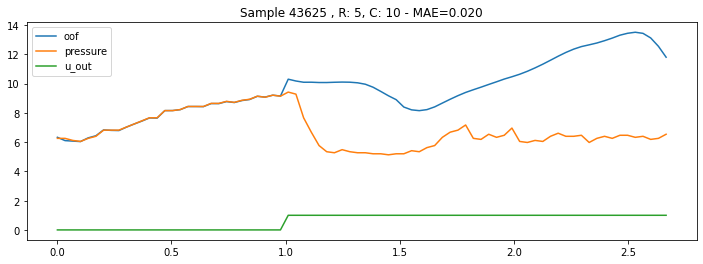

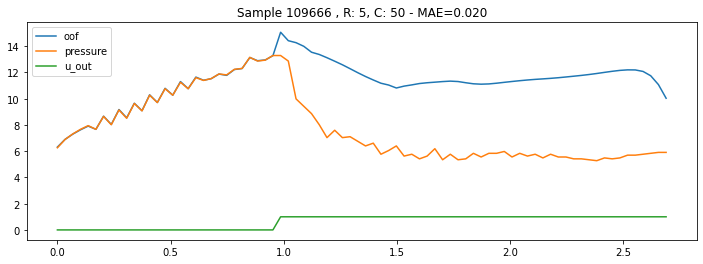

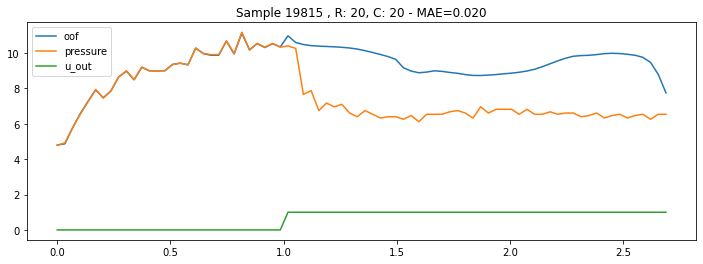

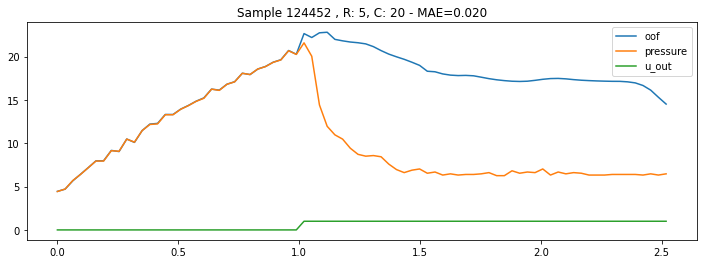

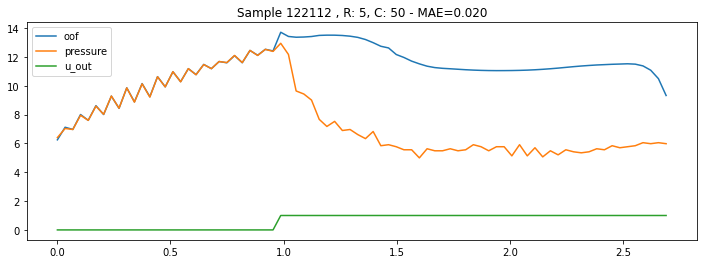

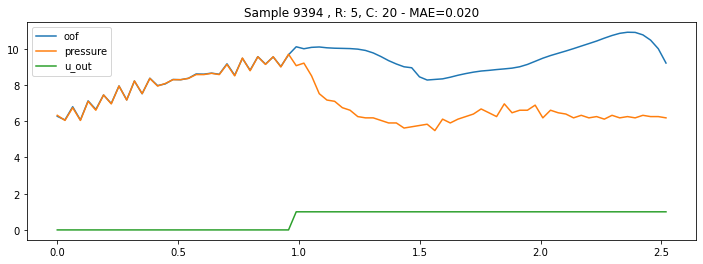

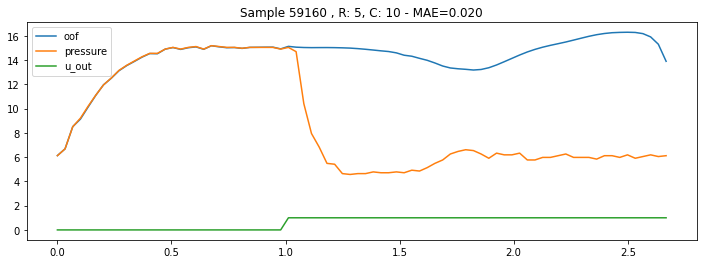

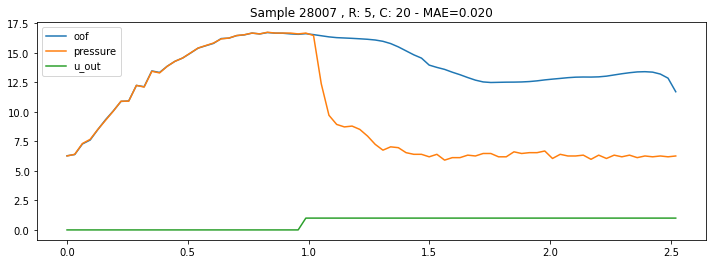

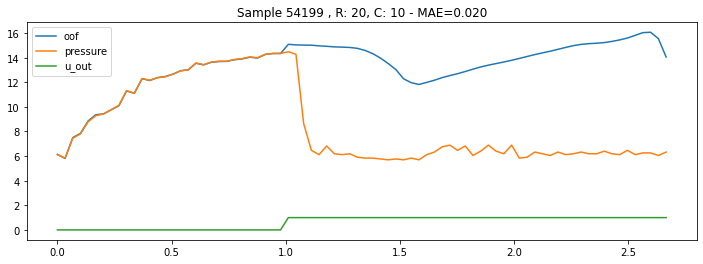

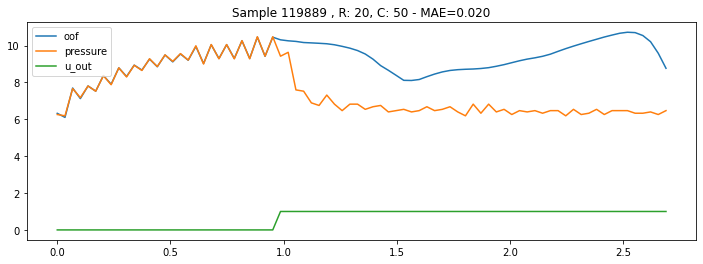

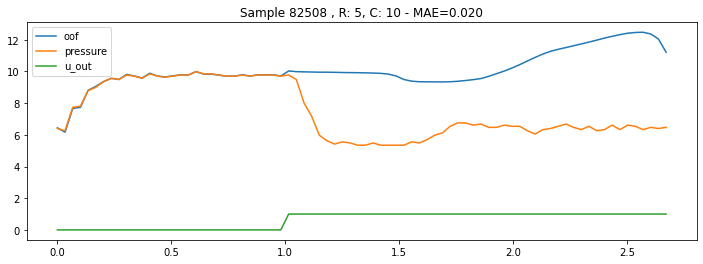

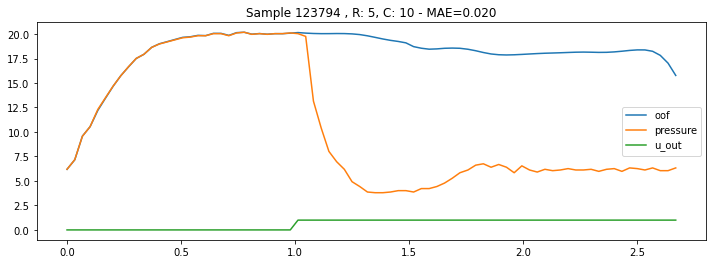

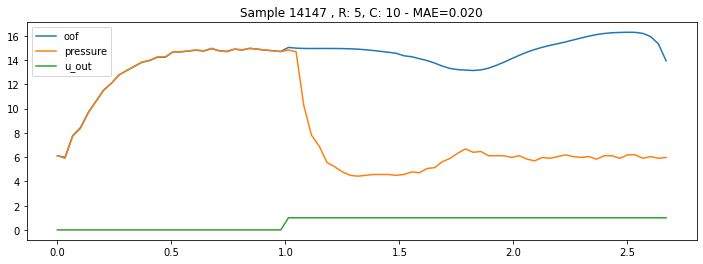

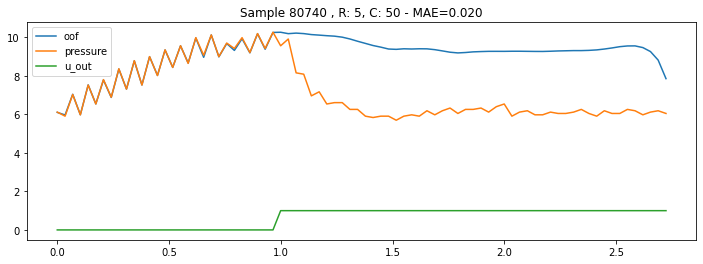

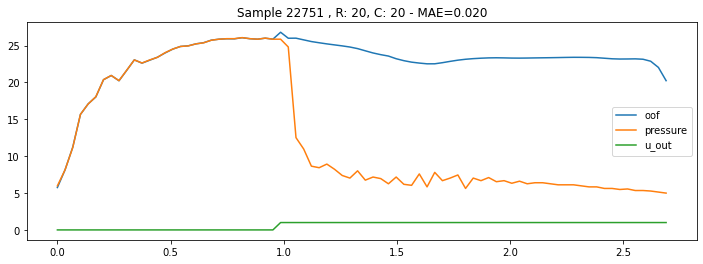

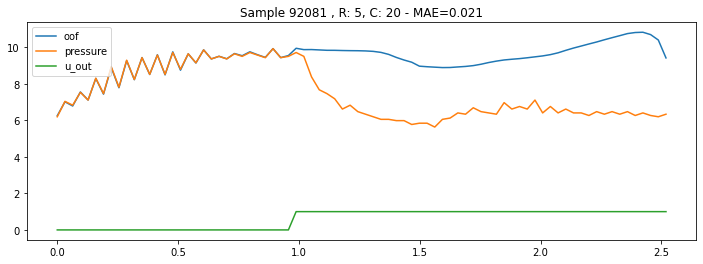

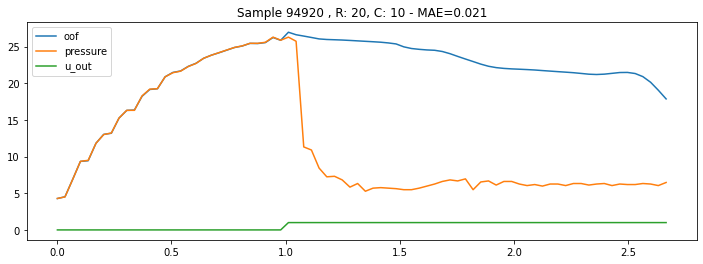

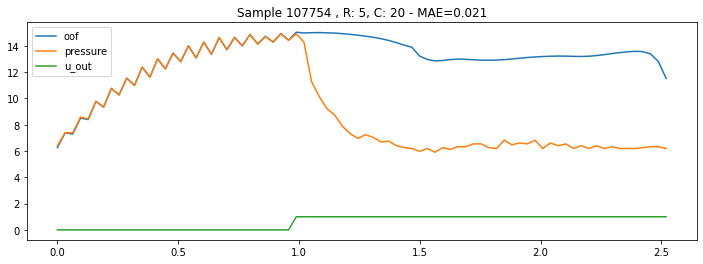

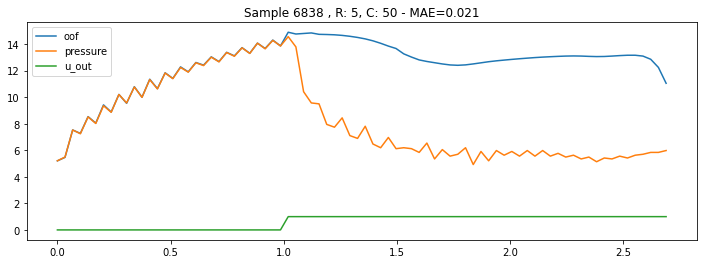

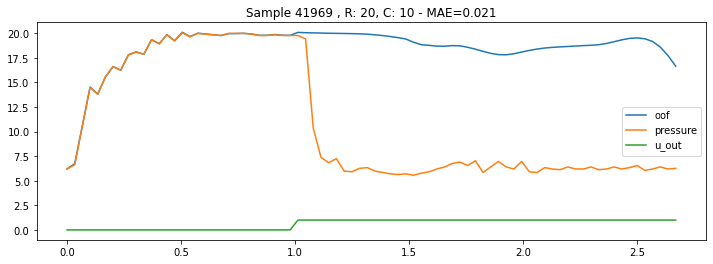

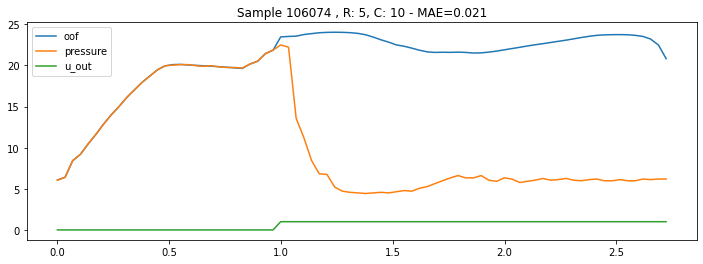

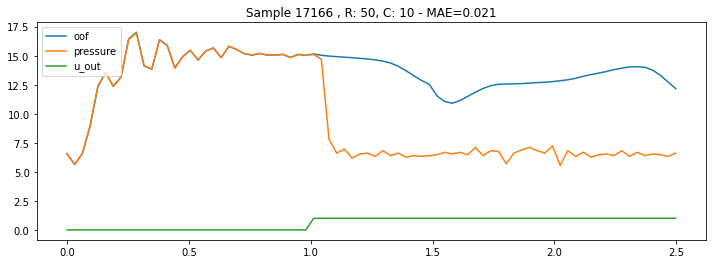

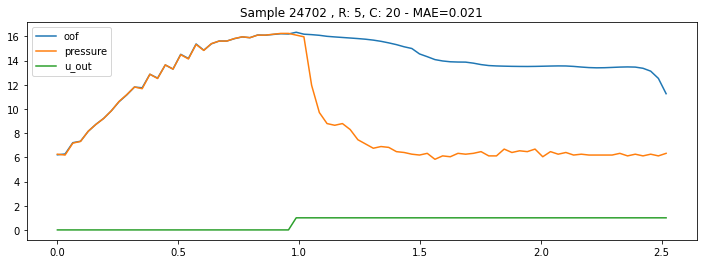

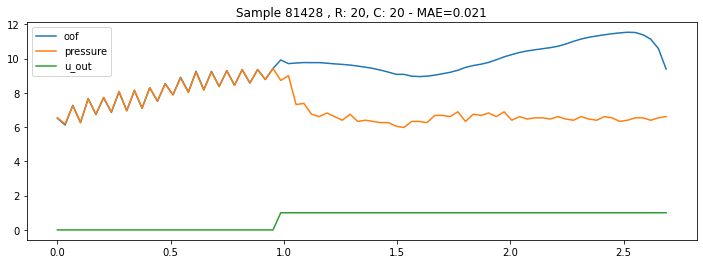

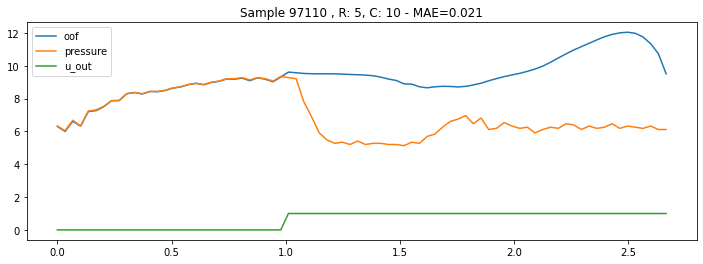

In [9]:
for id in breath_ids_2:
    plot_prediction(id,oof_preds)